<center><font size="+4">Statistical methods for Large, Complex Data 2020/2021</font></center>
<center><font size="+4">Primer on Computing</font></center>
<br/>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/StatsAndComputing20202021/raw/main/IPDP/jupyter/jupyterNotebooks/images/SSSA.png" width="700" alt="The extensible parallel architecture of MultiVeStA"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Francesca Chiaromonte f.chiaromonte@santannapisa.it</font></center>

<center><font size="+2">Co-lecturer </font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

---

<center><font size="+4">Advanced Libraries for data</font></center>
<center><font size="+4">manipulation/visualization in Python</font></center>

---

# Notes and references about this class

This notebook is mainly based on Chapter 4 of the following book:
* [Python for Data Analysis, 2nd edition, William Wesley McKinney (O’Reilly)](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
  * [Freely available Jupyter notebooks covering the examples/material of each chapter](https://github.com/wesm/pydata-book)
  * Some pictures have been taken from these sources
* Adapted from material from two classes in the _middle_ of course [IPDP: Introduction to Programming in Python](https://github.com/EMbeDS-education/StatsAndComputing20202021/wiki/IPDP)  by Andrea Vandin and Daniele Licari
    * Is it too advanced for you? Take a look at the [material from Module 1](https://github.com/EMbeDS-education/StatsAndComputing20202021/wiki/IPDP-Slides,-code-and-other-material)
      - _Introduction to programming by computer scientists for non-computer scientists_
    * Do you want to see more? Take a look at the [material from Module 2](https://github.com/EMbeDS-education/StatsAndComputing20202021/wiki/IPDP-Slides,-code-and-other-material)
      - _Introduction to Machine Learning in Python_
    * Please, follow [these instructions](https://github.com/EMbeDS-education/StatsAndComputing20202021/wiki/IPDP-Slides,-code-and-other-material) to configure your machine or... [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/EMbeDS-education/StatsAndComputing20202021/blob/main/SMLCD/jupyter/jupyterNotebooks/computing_NumPy_Pandas.ipynb)

In particular, this notebook introduces the libraries:
* [NumPy](https://numpy.org/): for scientific computing
* [Pandas](https://pandas.pydata.org/): 
   * for working with structured data (CSV, Spreadsheets, Databases)
   * for creating advanced plots

> Note: in this notebook we will often refer interchangeably to _arrays_, _NumPy arrays_ or just _ndarrays_. 
<br/>
> You can think of __arrays as lists with better performances__ for numerical computing

In [1]:
from IPython.display import IFrame
IFrame("https://www.kahoot.it/", 500, 500)

## Notes on Python, Julia and R

This web-based editor is JuPyteR-Lab
- __Ju__ stands for __Ju__ lia
- Pyt stands for __Pyt__ hon
- __R__ stands for __R__

If you want to use it for Julia programs
1. Download julia 1.0.5 from https://julialang.org/downloads/
1. Open the Julia app - You will get a terminal
    - Type `]` to enter in 'pkg mode'
    - Type `add IJulia` to use it in JuPyteR (https://github.com/JuliaLang/IJulia.jl)
    - Exit Julia
    - Run Jupyter-lab by typing `jupyter-lab` in the terminal

## Julia vs Pyhton
If you know Python, you also know part of Julia 
- Take a look at [this link](https://docs.julialang.org/en/v1/manual/noteworthy-differences/#Noteworthy-differences-from-Python) 
- It explains the main differences among the two languages
- In the same link you find similar info on matlab, R, C++...

Take also a look at rankings on the most used programming languages...

In [2]:
from IPython.display import IFrame
IFrame("https://www.tiobe.com/tiobe-index/", 1200, 700)

# NumPy
NumPy, _Numerical Python_, is the Python package for __scientific computing__

It provides:
* An efficient implementation for list-like multidimensional data structures named __NumPy arrays__ or __ndarray__
  * including functions for performing
    * element-wise computations on arrays 
    * mathematical operations between arrays
* Tools for reading/writing datasets from/to disk and arrays
* Linear algebra operations, Fourier transform, and random number generation
* 1-line plotting functionalities
* Tools for integrating C, C++, and Fortran code with Python
  * Useful to use legacy code
  * Useful to use very efficient and established libraries for scientific computation


NumPy arrays are a more efficient way of storing and manipulating data than the other built-in Python data structures.

## Install and import the NumPy module
The first time you run this notebook you might have to install Pandas using the following script:

In [3]:
import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install --upgrade pip

The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [4]:
import numpy as np
# import pandas as pd 
# import matplotlib.pyplot as plt

* This means that when you see `np.arange(4)`, we refer to `numpy.arange(4)`, the `arange` function in NumPy.

## Main features: Arrays, Vectorized Computation, Broadcast

Numpy provides:
* __ndarray__, a multidimensional array providing **vectorized arithmetic** operations and **broadcasting** capabilities
   * Vectorized arithmetic operations: 
     - Operations on arrays are done by iterating over the elements of the arrays at C level rather than at Python level, obtaining better performances. 
     - The syntax is more concise
   * [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html): 
     - In certain cases, operations on arrays can be done even if they do not have same dimensions. Pyhton tries to guess what to do
     - E.g., if you multiply an array by a constant, each entry of the arrays is multiplied by the constant
       - the constant is `broadcasted` on each entry of the array
     - No data is 'needlessly' copied, and the _iterations to broadcast_  are done at C level, obtaining better performances
* Standard mathematical functions for applying operations on entire arrays without having to write loops
  - Again, these guarantee C-level performances

Let's create a ndarray and a built-in Python list, each with 5mln elements.

In [5]:
import numpy as np
np_arr = np.arange(5000000) #5 mln
py_list = list(range(5000000)) #5 mln

print('np_arr has type',type(np_arr))
print('py_list has type',type(py_list))

np_arr has type <class 'numpy.ndarray'>
py_list has type <class 'list'>


**Performance comparison among  Numpy ndarrays and Python lists**
* Let's compute the square value of each element in the array/list

In [6]:
 print("Test NumPy Array")
 %time np_arr_power = np_arr ** 2

 print("\nTest Python list comprehension")
 %time py_list = [x ** 2 for x in py_list]

 print("\nTest Python list iteration")
 %time for i in range(len(py_list)): py_list[i]=py_list[i]**2

 print("\nTests completed")

Test NumPy Array
CPU times: user 13.6 ms, sys: 13.2 ms, total: 26.8 ms
Wall time: 166 ms

Test Python list comprehension
CPU times: user 2.06 s, sys: 247 ms, total: 2.3 s
Wall time: 3.57 s

Test Python list iteration
CPU times: user 2.59 s, sys: 50.3 ms, total: 2.64 s
Wall time: 2.7 s

Tests completed


## The NumPy ndarray: A Multidimensional Array

### What is an ndarray?

NumPy arrays are named **nd**array because they are **n**-**d**imensional arrays

In [7]:
import numpy as np
# Generate a 2x3 matrix with random data
data = np.random.randn(2, 3)
data

array([[ 1.05955771,  0.34874972, -1.54418652],
       [-0.63953151,  0.58068938,  0.75675704]])

Arrays enable you to perform
mathematical operations on each of their elements 
* using a syntax similar to the equivalent operations between (scalar) numbers

Below we 
* multiply by 10 **each value** in `data`
* double **each value** in `data`

In [8]:
data * 10

array([[ 10.59557709,   3.48749721, -15.4418652 ],
       [ -6.39531513,   5.80689376,   7.5675704 ]])

In [9]:
data + data

array([[ 2.11911542,  0.69749944, -3.08837304],
       [-1.27906303,  1.16137875,  1.51351408]])

A difference between Python lists and arrays
* lists can contain elements of **different type**
* arrays have to contain only elements of **same type**

Every array has 
* a`shape`, a tuple indicating the size of each dimension, 
  * `data.shape` is `(2,3)` because it has dimension 2x3
* a `dtype`, an object describing the type of the data in the array
  * `data.dtype` is `float64` because it contains floating point numbers (reals)
  *  Note that `float64` is a [data type defined in NumPy](https://numpy.org/doc/stable/user/basics.types.html). _More on this later_

In [10]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


### Creating ndarrays
The easiest way to create an array is to use the `array` function. 
* This will produce a new array containing the passed data

In [11]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
print(arr1)
print(arr1.shape)
print(arr1.dtype)

[6.  7.5 8.  0.  1. ]
(5,)
float64


List of lists, e.g. representing a matrix,
* can be converted into a multidimensional array 
* if internal lists have same length

In [12]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
print('data2\n',data2)
arr2 = np.array(data2)
print('arr2\n',arr2)
print(arr2.shape)
print(arr2.dtype)

data2
 [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2
 [[1 2 3 4]
 [5 6 7 8]]
(2, 4)
int64


Further functions for creating new arrays:
* `zeros` and `ones` create arrays of 0’s or 1’s, respectively, with a given length or shape.
* To create a higher dimensional array with these methods, pass a tuple for the shape:

In [13]:
print('np.zeros(10) =', np.zeros(10))
print('np.ones((3, 6)) =\n', np.ones((3, 6)))

np.zeros(10) = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
np.ones((3, 6)) =
 [[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


`arange` is an array-valued version of the built-in Python `range` function:
* It allows to represent an open interval [start,stop,step)
    - where only stop is mandatory.
    - note, `stop` does not belong to the range
* Beware to what you do: 
  - `range` is an iterator that creates elements on demand
  - `arange` fully creates the array allocating all the necessary space

In [14]:
print(np.arange(15))  #if you want integers
print(np.arange(15.)) #if you want reals
print(type(np.arange(15)))

print(range(15))
print(type(range(15)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
<class 'numpy.ndarray'>
range(0, 15)
<class 'range'>


### Data Types for ndarrays
The names of the numerical dtypes follow this convention: 
* A type name, like `float` or `int`, followed by the number of bits used to represent an element of this type.
* The higher is this number of bits, 
  * the higher precision (or the larger interval) you can use to store your data (GOOD)
  * the more memory is required to store your data (BAD)

For example, 
* a double-precision floating point value takes 64 bits (`float64`)
* an integer might take 32 (`int32`) or 64 bits (`int64`)
  * in the latter case being able to represent a larger interval of integers, but using up more space

In [15]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


You can explicitly convert or cast an array from one dtype to another using ndarray’s `astype` method
* This will create a `copy` of the original array, where elements have the new type

In [16]:
arr = np.array([1.1, 2.1, 3.1, 4.1, 5.1])
print(arr)
print('Before',arr.dtype,'\n')
int_arr = arr.astype(np.int32)
print(int_arr)
print('After ',int_arr.dtype)

[1.1 2.1 3.1 4.1 5.1]
Before float64 

[1 2 3 4 5]
After  int32


### Vectorized Arithmetics with NumPy Arrays

Once you have values in an array
* You can easily apply operations on each of its elements
  * Arithmetic operations between equal-size arrays are applied element-wise
  * Arithmetic operations between an array and a scalar (a number):
    * the operation is applied between each array element and the scalar
    * the scalar is said to be _broadcasted_ to all the array elements
* Similarly to list comprehensions, this does not require loops,
  * Note: as shown above, vectorized arithmetics is more efficient than the corresponding list comprehension operation (even more if compared to loops)

In [17]:
a = np.array([[1., 2., 3.], [4., 5., 6.]])
print('a = \n',a, '\n')
print('a * a = \n', a * a, '\n')
print('a - a = \n', a - a, '\n')
print('1 / a = \n', 1 / a, '\n')
print('a*0.5  \n=', a*0.5, '\n')
print('a**0.5  \n=', a**0.5, '\n')

a = 
 [[1. 2. 3.]
 [4. 5. 6.]] 

a * a = 
 [[ 1.  4.  9.]
 [16. 25. 36.]] 

a - a = 
 [[0. 0. 0.]
 [0. 0. 0.]] 

1 / a = 
 [[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]] 

a*0.5  
= [[0.5 1.  1.5]
 [2.  2.5 3. ]] 

a**0.5  
= [[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]] 



> Note that with `a * a` we do not compute the product of 2 matrices. 
> - We multiply them element-wise

### Basic Indexing and Slicing

#### Indexing and slicing 1-dimensional arrays

Arrays inherit `indexing` and `slicing` capabilities of __lists__

In [18]:
arr = np.arange(10)
print('arr',arr)
print('You can indexsingle entries:\narr[0] is',arr[0])
print('arr[5] is',arr[5])

arr [0 1 2 3 4 5 6 7 8 9]
You can indexsingle entries:
arr[0] is 0
arr[5] is 5


In [19]:
print('arr\n',arr)
print('You can create slices:')
print('arr[:8]  is\n',arr[:8])
print('arr[5:]  is\n          ',arr[5:])
print('arr[5:8] is\n          ',arr[5:8])

arr
 [0 1 2 3 4 5 6 7 8 9]
You can create slices:
arr[:8]  is
 [0 1 2 3 4 5 6 7]
arr[5:]  is
           [5 6 7 8 9]
arr[5:8] is
           [5 6 7]


A slice is a sort of `view` of the array
* You can assign it to a variable
* You can change its values
* **Beware**: no data is copied

In [20]:
arr[5:8] = 12
print('After arr[5:8] = 12 arr is\n',arr)

After arr[5:8] = 12 arr is
 [ 0  1  2  3  4 12 12 12  8  9]


In [21]:
my_slice=arr[5:8]
my_slice

array([12, 12, 12])

Note: 
* if you assign a scalar value to a __slice__ (a selection of some elements in an array)
  * as in `arr[5:8] = 12`
* then the value is propagated (or again _broadcasted_) to each selected element 

If you are familiar with Python lists you might have noticed an important difference
* When slicing a list, you actually create a copy 
* **Array slices are views on the original array**.
* The __data in a slice is not copied__
  * this is more efficient
  * and any modifications to the view will be reflected in the source array
  
Let's see another example  

In [22]:
print('source array', arr)
arr_slice = arr[5:8]
print('slice array', arr_slice)

source array [ 0  1  2  3  4 12 12 12  8  9]
slice array [12 12 12]


In [23]:
arr_slice[1] = 12345
print('source array (after arr_slice[1] = 12345):\n', arr)

source array (after arr_slice[1] = 12345):
 [    0     1     2     3     4    12 12345    12     8     9]


If you want a `copy of a slice of an ndarray` instead of a view, you will need to `explicitly copy` the array; 
* `arr2 = arr[5:8].copy()`

#### Indexing and slicing higher-dimensional arrays

With higher dimensional arrays, you have many more options. 
* A two-dimensional array is actually an array of arrays
  * Each entry of the _outer_ array contains an _inner_ array

In [24]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [25]:
arr1d=arr2d[0]
arr1d

array([1, 2, 3])

In [26]:
arr1d[2]

3

In [27]:
arr2d[0][2]

3

As for multidimensional lists, you can access single elements of inner arrays using nested `[]`
* `arr2d[0][2]` is `3`, the third element (index `2`) of the first inner array (index `0`)
* Alternatively, you can do `arr2d[0,2]`

In [28]:
print(arr2d)
print(arr2d[0][2])
print(arr2d[0, 2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
3
3


**See figure below for an illustration of indexing a 2D array** <br />
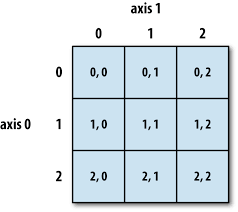

This is an example for 2-dimensional arrays
* It works the similarly for higher dimensions...

**BEWARE**
- When `indexing`, it does not make a difference whether you use
  - `arr2d[0][2]` or `arr2d[0, 2]`
- When `silicing`, it makes a **big difference** whether you use
  - `arr2d[:2,1:]` or `arr2d[:2][1:]`
  - Typically what you want to do is `arr2d[:2,1:]`

For `arr2d[:2,1:]`
- we first select the rows 0 and 1 `[1,2,3],[4,5,6]`
- from these, we select column 1 and 2 `[2,3],[5,6]`

In [29]:
print(arr2d[:2,1:])
arr2d[:2,1:].shape

[[2 3]
 [5 6]]


(2, 2)

For `arr2d[:2][1:]`
- we first select the rows 0 and 1 `[1,2,3],[4,5,6]`
- we select row 1 `[4, 5, 6]`

In [30]:
print(arr2d[:2])
print()
print(arr2d[:2][1:])
arr2d[:2][1:].shape

[[1 2 3]
 [4 5 6]]

[[4 5 6]]


(1, 3)

Further examples of indexing/slicing of higher dimensional arrays

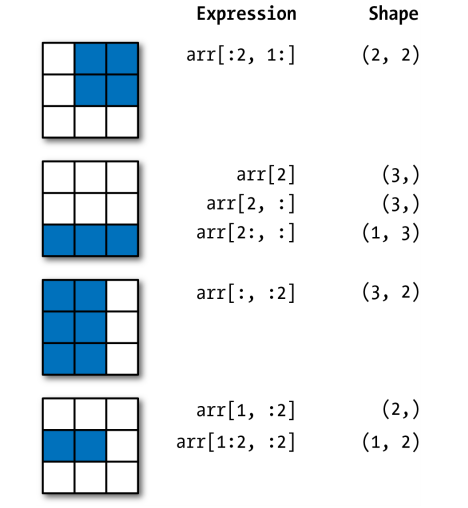

In [31]:
print(arr2d)
print()
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1 2 3]
 [4 5 6]]


We have sliced it along axis 0, the first axis (the rows). 
* A slice, therefore, selects a range of elements along an axis. 
* You can pass multiple slices just like you can pass multiple indexes

In [32]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

Assigning to a slice expression assigns to the whole selection by broadcasting

In [33]:
arr2d[:2, 1:] = 0 
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

We can also use a Boolean expression to select elements in an array
* we select the ones satisfying the Boolean expression

In [34]:
data = np.random.randn(7, 4)
print('Data\n',data)

Data
 [[ 0.68167207 -1.58254701 -0.43153459 -0.03537543]
 [-0.89196654 -1.5272941   1.05991331 -1.11380548]
 [-1.43962961 -0.94921657 -0.3911492  -1.8948043 ]
 [-0.20462767  0.73794054  1.26660598 -0.10818329]
 [ 0.24930019  0.86554043 -1.67065913 -0.41423993]
 [-1.33621621  1.74624914 -2.69711304  1.60068191]
 [ 0.68978741  1.11691679 -2.13687226 -0.44883934]]


In [35]:
data > 0

array([[ True, False, False, False],
       [False, False,  True, False],
       [False, False, False, False],
       [False,  True,  True, False],
       [ True,  True, False, False],
       [False,  True, False,  True],
       [ True,  True, False, False]])

In [36]:
data2=data[ data > 0]
print('Data2\n',data2)

Data2
 [0.68167207 1.05991331 0.73794054 1.26660598 0.24930019 0.86554043
 1.74624914 1.60068191 0.68978741 1.11691679]


## Mathematical and Statistical Methods
Arrays have a number of methods for 
* computing mathematical functions/statistics 
  * on the entire array 
  * on part of the array

### Reshaping an array

Arrays have a convenient method `reshape` to 
* change their dimensions without modifying the data
* Also in this case we compute views. 
  * **no data is actually copied**
  * any change to the view is observed also in the orginal data

For example, we can transform
* a 1-dimensional array with 15 entries
* into a 2-dimensional 3x5 array (a matrix)

In [37]:
arr = np.arange(15)
print("1-dimensional array arr\n",arr)
m=arr.reshape((3, 5))
print("2-dimensional matrix m\n",m)

print()
#m is a view!
m[0,0]=100
print("1-dimensional array arr after modifiyng the view m\n",arr)
print("2-dimensional matrix m after modifiyng the view m\n",m)

1-dimensional array arr
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2-dimensional matrix m
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

1-dimensional array arr after modifiyng the view m
 [100   1   2   3   4   5   6   7   8   9  10  11  12  13  14]
2-dimensional matrix m after modifiyng the view m
 [[100   1   2   3   4]
 [  5   6   7   8   9]
 [ 10  11  12  13  14]]


### Transposing Arrays
Arrays have the transpose method and also the special T attribute
* This is just a special reshape
* we compute a view - no actual copy

In [38]:
arr = np.arange(15)
m = arr.reshape(3,5)
print("Matrix m\n",m)
print()
print("Transposed matrix using T\n",m.T)
print()
print("Transposed matrix transpose()\n",m.transpose())

Matrix m
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

Transposed matrix using T
 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]

Transposed matrix transpose()
 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


When invoked on a matrix, they both give the transpose of such matrix
- See animation from [wikipedia](https://en.wikipedia.org/wiki/Transpose)

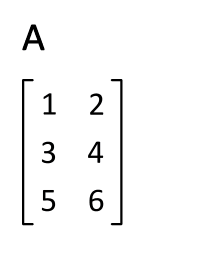

In [39]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif")

In addition, `transpose` can be invoked on arrays of any dimensions [to permute such dimensions](https://numpy.org/devdocs/reference/generated/numpy.transpose.html#numpy.transpose)
- reversing them by default
- or providing the new order for dimensions in input

In [40]:
x = np.ones((2, 3, 4))
print(x)
print('Shape of x\n',x.shape)
print('Shape of x.transpose()\n',x.transpose().shape)
print('Shape of x.transpose(0,2,1)\n',x.transpose(0,2,1).shape)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
Shape of x
 (2, 3, 4)
Shape of x.transpose()
 (4, 3, 2)
Shape of x.transpose(0,2,1)
 (2, 4, 3)


### Matrix product
If you want to [multply two matrices](https://en.wikipedia.org/wiki/Matrix_multiplication) you can use the `dot` method
* not just multiplying element-wise their elements
* but the classic row-column multiplication of matrixes

In [41]:
m1 = np.arange(4).reshape(2,2)
m2 = (np.arange(4)+4).reshape(2,2)
#np.dot(m.T,m)
print('m1\n',m1)
print('m2\n',m2)
print('m1.dot(m2)\n',m1.dot(m2))
print('Same as np.dot(m1,m2)\n',np.dot(m1,m2))

m1
 [[0 1]
 [2 3]]
m2
 [[4 5]
 [6 7]]
m1.dot(m2)
 [[ 6  7]
 [26 31]]
Same as np.dot(m1,m2)
 [[ 6  7]
 [26 31]]


### Square root
_np.sqrt()_ computes the square root of each element. Equivalent to m1 ** 0.5

In [42]:
print(np.sqrt(m1))
print(m1 ** 0.5)

[[0.         1.        ]
 [1.41421356 1.73205081]]
[[0.         1.        ]
 [1.41421356 1.73205081]]


### Aggregations
Aggregations (often called reductions) 
* like sum, mean, and standard deviation std of all elements in the matrix/array 
* can be computed by using the corresponding array method

In [43]:
print('matrix\n',m)
print('mean',m.mean())
print('sum',m.sum())
print('standard deviation',m.std())

print()
print('array\n',arr)
print('mean',arr.mean())
print('sum',arr.sum())
print('standard deviation',arr.std())

matrix
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
mean 7.0
sum 105
standard deviation 4.320493798938574

array
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
mean 7.0
sum 105
standard deviation 4.320493798938574


Functions like `sum`  and `mean`
* can be computed for each dimension rather than cumulatively 
* we do this specifying the `axis` (the dimension) over which we want to iterate

For example, using 
* `axis=0` we compute the sum/mean/std for each column of M
* `axis=1` we compute the sum/mean/std for each row of M

In [44]:
print('matrix\n',m)
print()

print('sum of each column\n',m.sum(axis=0))
print('mean of each column\n',m.mean(axis=0))
print('standard deviation of each column\n',m.std(axis=0))
print()

print('sum of each row\n',m.sum(axis=1))
print('mean of each row\n',m.mean(axis=1))
print('standard deviation of each row\n',m.std(axis=1))

matrix
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

sum of each column
 [15 18 21 24 27]
mean of each column
 [5. 6. 7. 8. 9.]
standard deviation of each column
 [4.0824829 4.0824829 4.0824829 4.0824829 4.0824829]

sum of each row
 [10 35 60]
mean of each row
 [ 2.  7. 12.]
standard deviation of each row
 [1.41421356 1.41421356 1.41421356]


### Sorting
Similarly to lists, 
* arrays can be sorted using the `sort()` method

In [45]:
arr = np.random.randn(8)
arr

array([-0.61077999, -0.89051417,  0.31781935,  1.04332836,  1.8251726 ,
       -1.45903821, -1.16018702, -1.67724006])

In [46]:
arr.sort()
arr

array([-1.67724006, -1.45903821, -1.16018702, -0.89051417, -0.61077999,
        0.31781935,  1.04332836,  1.8251726 ])

Multidimensional arrays are sorted by iteratively sorting each dimentsion. 
E.g. in matrices we 
* Sort the elements within each row
* We sort the rows using the lexicographical order

In [47]:
arr2d = np.random.randn(5, 3)
arr2d

array([[-0.49694964,  0.13341006, -2.48095662],
       [ 1.47942304, -0.58675224,  1.24967637],
       [-0.33157774,  1.55974212,  2.67482062],
       [-1.65646162, -1.23745704,  0.02464017],
       [ 1.60069806,  0.42805456,  1.08693618]])

In [48]:
arr2d.sort()
arr2d

array([[-2.48095662, -0.49694964,  0.13341006],
       [-0.58675224,  1.24967637,  1.47942304],
       [-0.33157774,  1.55974212,  2.67482062],
       [-1.65646162, -1.23745704,  0.02464017],
       [ 0.42805456,  1.08693618,  1.60069806]])

But we can also sort single dimensions

In [49]:
arr2d = np.random.randn(5, 3)
arr2d_cp0 = arr2d.copy()
arr2d_cp1 = arr2d.copy()
print(arr2d)

#Same the elements within each row (sort across columns)
arr2d.sort()
print('arr2d.sort()')
print(arr2d)

#Same the elements within each column (sort across rows)
arr2d_cp0.sort(0)
print('arr2d.sort(0)')
print(arr2d_cp0)

#Same as sort()
arr2d_cp1.sort(1)
print('arr2d.sort(1)')
print(arr2d_cp1)

[[-0.34894448 -0.30319387  0.79370562]
 [-0.74870457 -0.22536119 -0.31157809]
 [-0.11067607  0.85199688  0.30047357]
 [ 0.11874332 -1.23890366 -1.51923996]
 [-1.13084547  0.29661455  0.09701744]]
arr2d.sort()
[[-0.34894448 -0.30319387  0.79370562]
 [-0.74870457 -0.31157809 -0.22536119]
 [-0.11067607  0.30047357  0.85199688]
 [-1.51923996 -1.23890366  0.11874332]
 [-1.13084547  0.09701744  0.29661455]]
arr2d.sort(0)
[[-1.13084547 -1.23890366 -1.51923996]
 [-0.74870457 -0.30319387 -0.31157809]
 [-0.34894448 -0.22536119  0.09701744]
 [-0.11067607  0.29661455  0.30047357]
 [ 0.11874332  0.85199688  0.79370562]]
arr2d.sort(1)
[[-0.34894448 -0.30319387  0.79370562]
 [-0.74870457 -0.31157809 -0.22536119]
 [-0.11067607  0.30047357  0.85199688]
 [-1.51923996 -1.23890366  0.11874332]
 [-1.13084547  0.09701744  0.29661455]]


### Unique
NumPy has some basic set operations for 1-dimensional ndarrays. 
* The most common one is `np.unique()` 
  * returns the sorted unique values in an array

In [50]:
names = np.array(['Bob', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))

# pure Python alternative:
# sorted(set(names))

['Bob' 'Joe' 'Will']


## Logic functions 
- See also [here](https://numpy.org/doc/stable/reference/routines.logic.html)

We have seen how conditions can be checked on all elements in an array
- containing an array of same dimensions containing 
  - `True` for the elements satisfying the condition
  - `False` for the elements not satisfying the condition  

In [51]:
data = np.random.randn(7, 4)
data

array([[ 0.36191714,  2.00973208,  0.43254199, -0.49080188],
       [ 2.21860628, -0.87741832,  0.52509199, -0.34118816],
       [ 1.26424654,  0.78614915,  1.36570391, -0.0132901 ],
       [-1.46338433, -0.47559926, -1.1612947 ,  0.7200863 ],
       [-0.27932277, -0.70815724, -0.43435201, -0.29507245],
       [-0.40527306,  2.29235064, -0.47500045,  0.59672954],
       [-0.05116406,  0.00439751,  0.6992039 , -1.52203068]])

What numbers are greater than 0?

In [52]:
mask = data > 0
mask

array([[ True,  True,  True, False],
       [ True, False,  True, False],
       [ True,  True,  True, False],
       [False, False, False,  True],
       [False, False, False, False],
       [False,  True, False,  True],
       [False,  True,  True, False]])

NumPy offers __logic functions__ to check Boolean expressions on such Boolean arrays
- `any`: a generalization of **OR** returning `True` if at least one entry contains `True` 
- `all`: a generalization of **AND** returning `True` if at least one entry contains `True` 

As for the aggregation functions, these can be checked also on single dimensions

In [53]:
print(mask)
print()
print()

# any( axis)
# Test whether any array element along a given axis evaluates to True.
print('\nmask.any()\n', mask.any() )
print('\nmask.any(axis=0) - for each column\n', mask.any(axis=0) )
print('\nmask.any(axis=1) - for each row\n', mask.any(axis=1) )
#all(axis)

print()
print()
#Test whether all array elements along a given axis evaluate to True.
print('\nmask.all()\n', mask.all() )
print('\nmask.all(axis=0) - for each column\n', mask.all(axis=0) )
print('\nmask.all(axis=1) - for each row\n', mask.all(axis=1) )

[[ True  True  True False]
 [ True False  True False]
 [ True  True  True False]
 [False False False  True]
 [False False False False]
 [False  True False  True]
 [False  True  True False]]



mask.any()
 True

mask.any(axis=0) - for each column
 [ True  True  True  True]

mask.any(axis=1) - for each row
 [ True  True  True  True False  True  True]



mask.all()
 False

mask.all(axis=0) - for each column
 [False False False False]

mask.all(axis=1) - for each row
 [False False False False False False False]


# Pandas

[Pandas](https://pandas.pydata.org/) is another popular Python package. 
* It is built on top of NumPy (its data structures consist of several arrays)

Pandas provides rich data structures and functions designed to 
* make it easy, flexible and efficient working with structured data 
  - CSV files
  - Spreadsheets
  - Databases

E.g., Pandas allows to easily perform complex data manipulation like 
* _reshape_ and _slice_
* data aggregations 
* data selection
* merge/join tables

## Install and import the Pandas module

The first time you run this notebook you might have to install Pandas using the following script:

In [54]:
import sys
#!{sys.executable} -m pip install pandas

The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [55]:
#import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt

## Series

A Series is a one-dimensional list-like/array-like object containing __2 arrays__
* an ndarray containing the __actual data__
* an associated ndarray of __labels__ with one label (or index) per data element

Intuitively, you can see a Series as 
* a dictionary (a hash-map)
* or, in its simplest form, as a 1-dimensional array/list consisting of
  * an array of data, 
  * an implicit array of labels. It labels each element with its position

In [56]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

We note that 
* The string representation of a Series shows the index on the left and the values on the right
  * Obtained using the method `__str__` of the class Series


Since we did not specify an index
* a default array of labels containing integers from 0 to N - 1 is created.
* each element is labeled with its own position in the array

If you are interested only in one of the two arrays, just use

In [ ]:
print('Series index: ',obj.index)
print('Series values: ',obj.values)

Let's now create a Series whose entries are labelled by characters.

In [57]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [ ]:
obj2['a']

### Indexing, selection, and filtering

Similarly to Python [**dict**ionaries](https://docs.python.org/3/tutorial/datastructures.html), 
* you can use values in the index to select values in the main array

In [60]:
print("obj2['d'] = \n",obj2['d'])

obj2['d'] = 6
print("obj2['d']  (after obj2['d'] = 6) =\n",obj2['d'])

print('\nYou can also select a number of entries')
print("obj2[['c', 'a', 'd']] =")
print(obj2[['c', 'a', 'd']])
print(obj2[['a','c',  'd']])

obj2['d'] = 
 6
obj2['d']  (after obj2['d'] = 6) =
 6

You can also select a number of entries
obj2[['c', 'a', 'd']] =
c    3
a   -5
d    6
dtype: int64
a   -5
c    3
d    6
dtype: int64


Indexes are preserved by NumPy array operations like
* filtering with a boolean array, scalar multiplication, application of math functions

In [61]:
print("obj2")
print(obj2)
print()
print("NumPy operation obj2[obj2 > 0]")
print(obj2[obj2 > 0])
print()
print("NumPy operation obj2 * 2")
print(obj2 * 2)
print()
print("NumPy operation np.exp(obj2)")
print(np.exp(obj2))

obj2
d    6
b    7
a   -5
c    3
dtype: int64

NumPy operation obj2[obj2 > 0]
d    6
b    7
c    3
dtype: int64

NumPy operation obj2 * 2
d    12
b    14
a   -10
c     6
dtype: int64

NumPy operation np.exp(obj2)
d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64


What do you get with `obj2 > 0`?
- a copy of the series preserving the index, with `True`/`False` values

In [62]:
obj2 > 0

d     True
b     True
a    False
c     True
dtype: bool

You can create a Series using 
- a **dict**ionary 
- and a list as index

The list contains the keys of interest from the dictionary

In [68]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4 

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

We note that
* 3 values found in sdata were placed in the appropriate locations, 
* but since no value for `'California'` was found, it got a `NaN` (not a number) 
  * which is considered in pandas to mark missing/NA/NaN values
  
The `isnull` and `notnull` functions in pandas detect such missing values:

In [69]:
pd.isnull(obj4) 

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [70]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

E.g., if you want to use only the non-null values you do:

In [71]:
obj4[pd.notnull(obj4)]

Ohio      35000.0
Oregon    16000.0
Texas     71000.0
dtype: float64

In [66]:
obj4 = pd.Series(sdata)
obj4

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

## DataFrame
* A Series can be seen as 
  - a table with 1 column
  - a csv file with 1 column
  - ...
* A **DataFrame is a proper table/csv** with more columns
  * A series is just a simpler version of a dataframe
  * A dataframe is a series with **more main arrays** (one per column), and **one index**
  * DataFrames are the most important objects in pandas

### Creating DataFrame objects

The most common way to build a dataframe is by 
* using a dict containing lists or arrays of same length
  * each key/label becomes a column
    * if you specify a subset of key/labels, then only the corresponding column will be added
    * if you pass a column that isn’t contained in data, it will get NA values
  * each list/array element is a value for that column

In [72]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [73]:
frame = pd.DataFrame(data,columns=['state','nonExistingColumn'])
frame

,state,nonExistingColumn
0,Ohio,NaN
1,Ohio,NaN
2,Ohio,NaN
3,Nevada,NaN
4,Nevada,NaN
5,Nevada,NaN


In [74]:
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


We see above that the DataFrame also has an index/labels array
* the first column
  * in this case we have the default array of labels
  * but specific ones can be given explicitly

In [75]:
frame1 = pd.DataFrame(data, index = ['a','b','c','d','e','f'] )
frame1

,state,year,pop
a,Ohio,2000,1.5
b,Ohio,2001,1.7
c,Ohio,2002,3.6
d,Nevada,2001,2.4
e,Nevada,2002,2.9
f,Nevada,2003,3.2


A column of a DataFrame can be retrieved as a Series 
* by dict-like notation 
* or by attribute:

In [89]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
                      index=['one', 'two', 'three', 'four', 'five','six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [77]:
#Select single column or sequence of columns from the DataFrame
frame2['state'] # by dict-like notation 

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [78]:
frame2.state # by attribute

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

> Note the difference
> - `['state']` vs `.state`
<br/>
> They are both valid

In [79]:
frame2[['state','pop']]

,state,pop
one,Ohio,1.5
two,Ohio,1.7
three,Ohio,3.6
four,Nevada,2.4
five,Nevada,2.9
six,Nevada,3.2


If you create a dataframe using a 2-levels nested dictionary
* The keys of the outer dictionary will be used for the column names
* The keys of the inner dictionary will be used for the index names

In [80]:
inner_dict1 ={           2001: 2.4, 2002: 2.9}
inner_dict2 ={2000: 1.5, 2001: 1.7, 2002: 3.6}

outer_dict = {'Nevada': inner_dict1, 'Ohio': inner_dict2}
frame3 = pd.DataFrame(outer_dict)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


You can also choose which keys of the inner dict (i.e. which indexes) to use
* we are not using 2001 and 2000
* we are using a non-existing index 2003

In [81]:
pd.DataFrame(outer_dict, index=[2002, 2003])

,Nevada,Ohio
2002,2.9,3.6
2003,NaN,NaN


Like Series, the `values` attribute 
- returns the data contained in the DataFrame as a 2D ndarray

In [82]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

### Updating DataFrame objects

Values in a dataframe column can be modified by assignment. 
* If we assign a single value to a column, then the value is __broadcasted__ to the whole column
* E.g., the empty `debt` column can be initialized to 16.5 as:

In [83]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [90]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [88]:
#frame2['debt2'] = 16.5
#frame2

,year,state,pop,debt,debt2
one,2000,Ohio,1.5,16.5,16.5
two,2001,Ohio,1.7,16.5,16.5
three,2002,Ohio,3.6,16.5,16.5
four,2001,Nevada,2.4,16.5,16.5
five,2002,Nevada,2.9,16.5,16.5
six,2003,Nevada,3.2,16.5,16.5


In [91]:
frame2.debt=0.0
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,0.0
three,2002,Ohio,3.6,0.0
four,2001,Nevada,2.4,0.0
five,2002,Nevada,2.9,0.0
six,2003,Nevada,3.2,0.0


When assigning lists or arrays to a column, 
- they must contain as many elements as rows in the DataFrame

In [92]:
frame2['debt'] = np.arange(6.)
print(frame2)
#The following would not work
#frame2['debt'] = np.arange(8)
frame2.dtypes

       year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0


year       int64
state     object
pop      float64
debt     float64
dtype: object

Creating and deleting columns
* Assigning a column that doesn’t exist will create a new column. 
* The del keyword will delete columns as with a dict

In [93]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [95]:
frame2['eastern'] =  (frame2.state == 'Ohio')
#frame2['eastern'] = True
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,0.0,True
two,2001,Ohio,1.7,1.0,True
three,2002,Ohio,3.6,2.0,True
four,2001,Nevada,2.4,3.0,False
five,2002,Nevada,2.9,4.0,False
six,2003,Nevada,3.2,5.0,False


In [96]:
frame2.state == 'Ohio'

one       True
two       True
three     True
four     False
five     False
six      False
Name: state, dtype: bool

> Note, you **cannot** create columns using the attribute notation
> * `frame2.easterntwo =  (frame2.state == 'Ohio')`

Deleting columns and rows
- `del` modifies the dataframe on which it is applied
- [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) has a number of useful attributes
  - can be used to delete columns or rows
  - creates a copy by default, but can also act on the current one

In [97]:
del frame2['eastern']
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [99]:
frame2['new_col']=np.arange(6)
print('frame2')
print(frame2)

frame2del = frame2.drop(['new_col'],axis=1)
print('\nframe2del')
print(frame2del)
print('\nframe2')
print(frame2)

frame2
       year   state  pop  debt  new_col
one    2000    Ohio  1.5   0.0        0
two    2001    Ohio  1.7   1.0        1
three  2002    Ohio  3.6   2.0        2
four   2001  Nevada  2.4   3.0        3
five   2002  Nevada  2.9   4.0        4
six    2003  Nevada  3.2   5.0        5

frame2del
       year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0

frame2
       year   state  pop  debt  new_col
one    2000    Ohio  1.5   0.0        0
two    2001    Ohio  1.7   1.0        1
three  2002    Ohio  3.6   2.0        2
four   2001  Nevada  2.4   3.0        3
five   2002  Nevada  2.9   4.0        4
six    2003  Nevada  3.2   5.0        5


> Drop can modify the current DataFrame if setting `inplace=True`

In [ ]:
frame2['new_col']=np.arange(6)
frame2
print('frame2')
print(frame2)

frame2.drop(['new_col'],axis=1,inplace=True)
print('\nframe2')
print(frame2)

In [ ]:
#You get error
#frame2.drop(['new_col'],axis=1,inplace=True)

In [ ]:
#frame2.drop(['new_col'],axis=1,inplace=True) #deleting a non existing column gives errors
frame2.drop(['new_col'],axis=1,inplace=True,errors='ignore') #you can ignore errors

We have just seen how to __delete columns__

In order to __delete rows__ 
* you just use the `drop` method without specifying the `axis` (or using `axis=0`)

In [100]:
frame2

,year,state,pop,debt,new_col
one,2000,Ohio,1.5,0.0,0
two,2001,Ohio,1.7,1.0,1
three,2002,Ohio,3.6,2.0,2
four,2001,Nevada,2.4,3.0,3
five,2002,Nevada,2.9,4.0,4
six,2003,Nevada,3.2,5.0,5


In [101]:
frame100 = frame2.drop(['five'])
frame100

,year,state,pop,debt,new_col
one,2000,Ohio,1.5,0.0,0
two,2001,Ohio,1.7,1.0,1
three,2002,Ohio,3.6,2.0,2
four,2001,Nevada,2.4,3.0,3
six,2003,Nevada,3.2,5.0,5


In [102]:
frame100['year']=100
frame100

,year,state,pop,debt,new_col
one,100,Ohio,1.5,0.0,0
two,100,Ohio,1.7,1.0,1
three,100,Ohio,3.6,2.0,2
four,100,Nevada,2.4,3.0,3
six,100,Nevada,3.2,5.0,5


In [103]:
frame100.drop(['four','three'],inplace=True)
frame100

,year,state,pop,debt,new_col
one,100,Ohio,1.5,0.0,0
two,100,Ohio,1.7,1.0,1
six,100,Nevada,3.2,5.0,5


In [104]:
frame2

,year,state,pop,debt,new_col
one,2000,Ohio,1.5,0.0,0
two,2001,Ohio,1.7,1.0,1
three,2002,Ohio,3.6,2.0,2
four,2001,Nevada,2.4,3.0,3
five,2002,Nevada,2.9,4.0,4
six,2003,Nevada,3.2,5.0,5


You can also delete rows (or columns) for a given condition
- What if I don't care about Nevada?

In [106]:
frameNoNevada=frame2.drop(frame2[frame2.state=='Nevada'].index)
frameNoNevada

,year,state,pop,debt,new_col
one,2000,Ohio,1.5,0.0,0
two,2001,Ohio,1.7,1.0,1
three,2002,Ohio,3.6,2.0,2


In [108]:
frame2.state=='Nevada'

one      False
two      False
three    False
four      True
five      True
six       True
Name: state, dtype: bool

In [110]:
frame2[frame2.state=='Nevada']

,year,state,pop,debt,new_col
four,2001,Nevada,2.4,3.0,3
five,2002,Nevada,2.9,4.0,4
six,2003,Nevada,3.2,5.0,5


In [111]:
frame2[frame2.state=='Nevada'].index

Index(['four', 'five', 'six'], dtype='object')

Similarly to multi-dimensional arrays, 
* you can **transpose** the result:

In [ ]:
frame2

In [112]:
frame2.T

,one,two,three,four,five,six
year,2000,2001,2002,2001,2002,2003
state,Ohio,Ohio,Ohio,Nevada,Nevada,Nevada
pop,1.5,1.7,3.6,2.4,2.9,3.2
debt,0.0,1.0,2.0,3.0,4.0,5.0
new_col,0,1,2,3,4,5


In [113]:
frame2.transpose()

,one,two,three,four,five,six
year,2000,2001,2002,2001,2002,2003
state,Ohio,Ohio,Ohio,Nevada,Nevada,Nevada
pop,1.5,1.7,3.6,2.4,2.9,3.2
debt,0.0,1.0,2.0,3.0,4.0,5.0
new_col,0,1,2,3,4,5


As for array, no data is actually copied when transposing
* unless you specify it with attribute **copy**

> __BEWARE__: A copy will be always created if the dataframe contains __mixed dtypes__

In [ ]:
frame2.dtypes

In [ ]:
#Given that we have strings, integers and flaots, a copy is done no matter what
frame2T=frame2.transpose(copy=False)
frame2.year=frame2.year-100
print(frame2)
print()
print(frame2T)

In [ ]:
frame2=frame2.astype({'year': 'float64'})
frame2.dtypes

In [ ]:
frame2.drop(['state'],axis=1,inplace=True)
frame2

In [ ]:
frame2.dtypes

We now have just floats. 
- Therefore a copy will be created only if required

In [ ]:
frame2T=frame2.transpose(copy=False)
frame2.year=frame2.year-100
print(frame2)
print()
print(frame2T)

### Indexing, selection, and filtering


Indexing into a DataFrame 
- allows retrieving one or more of its columns:

In [114]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [115]:
data['two'] #retrieving one column

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [116]:
data[['three', 'one']] #retrieving two columns

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


> If you select by slicing or Boolean expression, 
> - it is interpreted as a selection on __rows__

In [117]:
data[:2] #rows by slicing 

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [118]:
data[ data['three'] > 5 ]  #rows by a boolean array

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### 'Better' selection using iloc and loc

The `iloc` field of dataframes allows to select subsets of rows and columns using NumPy-like notation
* The iloc indexer for Pandas Dataframe is used for integer-location based indexing / selection by position.
* `data.iloc[row selection, column selection]`
   - column selection is optional
   - **a bit like selections with 2-dimensional arrays seen before**

In [119]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [124]:
data.iloc[1]   # second row

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [126]:
second_row=data.iloc[1]   # second row
second_row

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [121]:
data.iloc[-1]  # last row

one      12
two      13
three    14
four     15
Name: New York, dtype: int64

In [122]:
data.iloc[:,1] # second column

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [123]:
data.iloc[:,-1] # last column

Ohio         3
Colorado     7
Utah        11
New York    15
Name: four, dtype: int64

In [ ]:
data

Multiple row and column selections using iloc
- all rows   , first two columns, 
- last 2 rows, first two columns, 

In [127]:
data.iloc[:, :2] # all rows, first 2 columns

,one,two
Ohio,0,1
Colorado,4,5
Utah,8,9
New York,12,13


In [128]:
data.iloc[2:, :2] # rows 2,3, first 2 columns

,one,two
Utah,8,9
New York,12,13


In [129]:
data.iloc[[1, 2], [3, 0, 1]] # 2nd 3rd row,  4th 1st 2nd columns.

,four,one,two
Colorado,7,4,5
Utah,11,8,9


The `loc` indexer works similarly
* but you use column/index names rather than positions
    - Selecting rows by label/index
    - Selecting rows with a boolean / conditional lookup
* The loc indexer is used with the same syntax as iloc: `data.loc[row selection, column selection]`

> * `loc` gets rows (and/or columns) with particular **labels**
> * `iloc` gets rows (and/or columns) at integer **locations**

In [130]:
print(data)
print()
print(data.loc['Colorado','O[hio']]) #List of labels index.
print()
print(data.loc[:,'one']) # first column of data frame
print()

# Multiple row and column selections using loc and DataFrame
print(data.loc[['Colorado','Ohio'], ['one','four']])  # 'Colorado','Ohio' row + 'one','four'columns.

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

          one  two  three  four
Colorado    4    5      6     7
Ohio        0    1      2     3

Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int64

          one  four
Colorado    4     7
Ohio        0     3


In [ ]:
data

In [131]:
data.loc['Colorado':'New York', 'two':]

,two,three,four
Colorado,5,6,7
Utah,9,10,11
New York,13,14,15


### Arithmetics and Data Alignment
When summing 2 dataframes with different sets of indexes we get a dataframe where 
* either only entries with column-index in both dataframes exist (default)
* all entries with column-index in at least one dataframe exist (`fill_value=0`)

This is known as __data alignment__

#### column-index must exist in both dataframes

In [132]:
df1 = pd.DataFrame(np.arange(4.).reshape((2, 2)), 
                   columns=list('ab'),
                   index=['Texas', 'Colorado'])
df1

,a,b
Texas,0.0,1.0
Colorado,2.0,3.0


In [133]:
df2 = pd.DataFrame((np.arange(3.)+4).reshape((1, 3)), 
                   columns=list('abc'),
                   index=['Texas'])
df2

,a,b,c
Texas,4.0,5.0,6.0


In [134]:
df1 + df2

,a,b,c
Colorado,NaN,NaN,NaN
Texas,4.0,6.0,NaN


#### column-index must exist in one dataframe

If you want to see **Colorado** in the result
- You can fill a **default value**

In [135]:
df1.add(df2, fill_value=0)

,a,b,c
Colorado,2.0,3.0,NaN
Texas,4.0,6.0,6.0


In [136]:
df1.add(df2, fill_value=100)

,a,b,c
Colorado,102.0,103.0,NaN
Texas,4.0,6.0,106.0


> `Colorado,c` remains NA because it does not appear in any dataframe

### NumyPy & function application and mapping

#### A digression on `lambda` functions

__[Lambda functions](https://www.w3schools.com/python/python_lambda.asp)__: in some cases, it might be convenient to define on-the-fly anonymous simple functions
* __anonymous__: the function has no name
* __simple__: the function can consist only of one expression

A lambda function computes the sum of two numbers: 
- `lambda a, b: a+b`

Recall:
- Everything in python is an object, also (lambda) functions
  - You can assign them to variables
  - You can pass them as parameters

In [137]:
my_lfun = lambda a, b: a+b
print(type(my_lfun))
my_lfun(1,2)

<class 'function'>


3

In [139]:
def expression_evaluator(f,n1,n2):
    print('The result is',f(n1,n2))

expression_evaluator(lambda a, b: a+b, 1,2)
expression_evaluator(lambda a, b: a*b, 1,2)

The result is 3
The result is 2


A lambda function is really nothing more than a simple function without name
* Why should we use them then?
* Due to syntactic limiations regarding `def`

There are places where `def` cannot be used:
* In arguments of functions or in return statements

Lambda expressions can help you avoiding annoying workarounds
* In the end, it is mostly syntactic sugar

An interesing feature related to lambda functions are
- Python closurses to *attach data to code*

In [ ]:
# Python closures and lambda expressions
#    We attach data to code
def myfunc(n):
    return lambda a : a * n

mydoubler = myfunc(2)
mytripler = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

In [ ]:
#This cannot be done
# def myfunc(n):
#   return def aaa(a) :
#             a * n            

However you can do

In [ ]:
def myfunc(n):
    def myinnerfunc(a) : 
        return a * n
    return myinnerfunc

mydoubler2 = myfunc(2)
mytripler2 = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

Lambda functions are typically used in conjunction with
* __map__: applies a given function to each element in a sequence
* __filter__: applies a Boolean function to each element in a sequence, and returns only those evaluated to `true`
* __reduce__: applies cumulatively a given function to the elements in a sequence, and return the cumulative result

Some examples and interesting discussions on lambdas, map, filter, and reduce can be found at:
* [Reference 1](https://book.pythontips.com/en/latest/map_filter.html#map-filter-and-reduce)
* [Reference 2](https://www.learnpython.org/en/Map,_Filter,_Reduce)

Here we see how lambda functions allow to 
- _enrich_ the set of functions applicable to DataFrames
- apply _compactly_ complex functions to DataFrames

#### Function application and mapping
NumPy [ufuncs](https://www.w3schools.com/python/numpy_ufunc.asp) 
- element-wise array functions
- work fine also with pandas objects

In [140]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.457376,0.349526,-0.162081
Ohio,3.275154,1.088296,-1.197000
Texas,0.857563,1.775194,0.373137
Oregon,-0.583301,-0.244381,-1.262235


In [141]:
np.abs(frame)

,b,d,e
Utah,0.457376,0.349526,0.162081
Ohio,3.275154,1.088296,1.197000
Texas,0.857563,1.775194,0.373137
Oregon,0.583301,0.244381,1.262235


But you can also apply any function thought for 1d arrays to each column or row.

In [142]:
my_abs = lambda arr: arr.abs()
frame.apply(my_abs)

,b,d,e
Utah,0.457376,0.349526,0.162081
Ohio,3.275154,1.088296,1.197000
Texas,0.857563,1.775194,0.373137
Oregon,0.583301,0.244381,1.262235


In [143]:
f = lambda arr: arr.abs() * 2
frame.apply(f)

,b,d,e
Utah,0.914752,0.699051,0.324161
Ohio,6.550308,2.176592,2.394001
Texas,1.715125,3.550388,0.746273
Oregon,1.166601,0.488762,2.524470


In [144]:
f = lambda arr: arr.max()
frame.apply(f) 

b    3.275154
d    1.775194
e    0.373137
dtype: float64

In [146]:
frame.apply(f, axis='columns')

Utah      0.457376
Ohio      3.275154
Texas     1.775194
Oregon   -0.244381
dtype: float64

Element-wise Python functions can be used as well
- [`applymap`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html) applies a function that accepts and returns a scalar to every element of a DataFrame
- `map` can be used to obtain same result for series

In [ ]:
frame

In [148]:
times_ten = lambda x: x*10
frame.applymap(times_ten)

,b,d,e
Utah,4.573760,3.495256,-1.620805
Ohio,32.751542,10.882960,-11.970003
Texas,8.575626,17.751939,3.731365
Oregon,-5.833006,-2.443810,-12.622351


In [153]:
frame[['b','e']].applymap(times_ten)

,b,e
Utah,4.573760,-1.620805
Ohio,32.751542,-11.970003
Texas,8.575626,3.731365
Oregon,-5.833006,-12.622351


In [164]:
frame['e'].map(times_ten)

Index(['Utah', 'Ohio', 'Texas', 'Oregon'], dtype='object')

### Sorting
To sort
lexicographically by row or column index, use the `sort_index` method, 
- which returns a new, sorted object:

In [154]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [155]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [ ]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['three', 'two','one'],
                     columns=['c', 'a', 'b'])
frame

In [ ]:
frame.sort_index() # sorting by the index

In [ ]:
frame.sort_index(axis=1,ascending=False) #  sorting  by column index  in descending order

We saw how to sort according to the 'name' of the index or of the column

If you want to **sort according to the values** in the dataframe you should use
- [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [156]:
frame

,b,d,e
Utah,0.457376,0.349526,-0.162081
Ohio,3.275154,1.088296,-1.197000
Texas,0.857563,1.775194,0.373137
Oregon,-0.583301,-0.244381,-1.262235


In [157]:
frame.sort_values(by='b',ascending=False)

,b,d,e
Ohio,3.275154,1.088296,-1.197000
Texas,0.857563,1.775194,0.373137
Utah,0.457376,0.349526,-0.162081
Oregon,-0.583301,-0.244381,-1.262235


### Summarizing and Computing Descriptive Statistics
Series and Dataframes offer methods for computing mathematical/statistical methods. 
* Most of these are reductions or summary statistics, 
  * methods that compute
    * For Series: a single value (e.g. sum or mean) 
    * For DataFrames: a Series of values from the rows or columns. 

In [159]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [160]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [161]:
df.sum()

one    9.25
two   -5.80
dtype: float64

Note that NaN are ignored
* `9.25/3 = 3.083333`

In [162]:
df.mean()

one    3.083333
two   -2.900000
dtype: float64

idxmin and idxmax, return 
* the index containing the minimum or maximum values

In [ ]:
df

In [163]:
df.idxmax()

one    b
two    d
dtype: object

In [ ]:
df.idxmin()

The method `describe` computes a number of summary statistics in one shot:

In [ ]:
df.describe() #Compute set of summary statistics for Series or each DataFrame column

 ### Value Counts, Membership and Missing Data
 Another class of related methods extracts information about the values contained in a
one-dimensional Series. 

In [165]:
df = pd.DataFrame([['a', 'b'], [np.nan, 'a'],
                   ['b', 'b'], ['a', 'b']],
                  index=[1,2,3,4],
                  columns=['one', 'two'])

df

,one,two
1,a,b
2,NaN,a
3,b,b
4,a,b


In [167]:
df.two.unique() # unique, which gives you an array of the unique values in a Series

array(['b', 'a'], dtype=object)

In [168]:
df['two'].unique()

array(['b', 'a'], dtype=object)

In [169]:
df.two.value_counts() # computes a Series containing value frequencies:

b    3
a    1
Name: two, dtype: int64

`isin` is responsible for 
- vectorized set membership 

In [170]:
df.one

1      a
2    NaN
3      b
4      a
Name: one, dtype: object

In [171]:
df.one[df.one.isin(['b', 'a'])]

1    a
3    b
4    a
Name: one, dtype: object

In [ ]:
df.one[df.one.isin(['b'])]

In certain cases, you might want to **filter out missing data**
- You can use [`dropna`](https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php) to drop rows with at least one NAN
- Or columns with at least one NAN using `dropna(axis='columns')`

In [172]:
df

,one,two
1,a,b
2,NaN,a
3,b,b
4,a,b


In [173]:
df.dropna()

,one,two
1,a,b
3,b,b
4,a,b


In [174]:
df.dropna(axis='columns')

,two
1,b
2,a
3,b
4,b


### Concatenate, Merge, Join
Sometimes we don't have just 1 dataframe, 
- but more that we want to combine in different ways

Pandas provides various facilities for easily combining together DataFrames

#### Concatenating Along an Axis
If we have dataframes representing _chunks_ of data with same structure 
- e.g., sets of rows of a table
- we can use `concat` to concatenate their rows
  - many more options [exist](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

In [177]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])


df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])
 

df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [179]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [180]:
frames = [df1, df2, df3]

result = pd.concat(frames, axis=0)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


Note, you might need to sort the resulting dataframe

In [181]:
frames = [df2, df1, df3]

result = pd.concat(frames, axis=0)
result

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [182]:
result.sort_index()

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


What if some rows have same index?
- You get more rows with same index! 

In [183]:
frames = [df2, df2]
result = pd.concat(frames, axis=0)
result

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [184]:
result.loc[4]

,A,B,C,D
4,A4,B4,C4,D4
4,A4,B4,C4,D4


If you want to avoid this:
- Reset the index afterwards `result.reset_index()`
- Change the index of one of the two before concatenating

But, in general, we suggest to use conact only if this case does not arise.
> Indeed, it is useful to split first a big dtaframe, working on the single parts and putting them back together

Thanks to __data alignment__, you can also concatenate dataframe with 
- __not perfectly matching structure__

In [185]:
df2['E']= ['E8', 'E9', 'E10', 'E11']
df2.drop(['D'],axis=1,inplace=True)
print('df2\n',df2)

frames = [df1, df2, df3]

result = pd.concat(frames, axis=0)
result

df2
     A   B   C    E
4  A4  B4  C4   E8
5  A5  B5  C5   E9
6  A6  B6  C6  E10
7  A7  B7  C7  E11


,A,B,C,D,E
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,A4,B4,C4,NaN,E8
5,A5,B5,C5,NaN,E9
6,A6,B6,C6,NaN,E10
7,A7,B7,C7,NaN,E11
8,A8,B8,C8,D8,NaN
9,A9,B9,C9,D9,NaN


#### Database-style merging and joining

Dimensions in combining dataframes
- `concat` combines dataframes _vertically_
   - we put together _rows_
   - but we can also add columns specifying `axis`
- [`merge` and `join`](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) combine dataframes _horizontally_
   - we put together _columns_   
   
Some examples below were taken from [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

##### Merge

`Merge` operations combine datasets by 
- Linking rows using one or more keys (i.e. columns).
- These operations are central to relational databases. 
  - After all, dataframes are tables ...

Let's look at an example of `merge`

In [186]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key': ['K0', 'K0', 'K2', 'K2'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [187]:
right

,key,C,D
0,K0,C0,D0
1,K0,C1,D1
2,K2,C2,D2
3,K2,C3,D3


We want to obtain a dataframe with columns `key` and `A` to `D`, combining rows 
- with same value of `key`

In [188]:
pd.merge(left, right,  how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K0,A0,B0,C1,D1
2,K2,A2,B2,C2,D2
3,K2,A2,B2,C3,D3


In [189]:
pd.merge(left, right,  how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K0,A0,B0,C1,D1
2,K1,A1,B1,NaN,NaN
3,K2,A2,B2,C2,D2
4,K2,A2,B2,C3,D3
5,K3,A3,B3,NaN,NaN


In [190]:
pd.merge(left, right,  how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K0,A0,B0,C1,D1
2,K1,A1,B1,NaN,NaN
3,K2,A2,B2,C2,D2
4,K2,A2,B2,C3,D3
5,K3,A3,B3,NaN,NaN


- The _how_ argument determines which keys are to be included in the resulting table

|  Merge method |Description  |
|---|---|
|  left |  Use keys from left frame only |  
|  right |  Use keys from right frame only |  
|  outer |  Use union of keys from both frames |  
|  inner (default) | Use intersection of keys from both frames  |  


Instead, _on_ specifies the Column to join on. 
- This must appear in both combined DataFrames

What if you want to ignore certain columns? 

In [ ]:
pd.merge(left, right,  how='inner', on='key')

In [ ]:
right

In [ ]:
pd.merge(left, right[['key','C']],  how='inner', on='key')

##### Join

Pandas exposes another method for applying merge-like operations
- **join**

Both `merge` and `join` are based on a common inner method.
- join could be useful in [specific cases](https://stackoverflow.com/questions/22676081/what-is-the-difference-between-join-and-merge-in-pandas)

# Simple application to Italian COVID data - load/manipulate remote CSV file

In [191]:
import pandas as pd 

Using Python and pandas, it is easy to read data from text files

One convenient feature is __type inference__
* You don’t need to specify which columns are numeric, integer, boolean, or string. 
* Handling dates and other custom types requires a bit more effort, though. 

Let us consider the national-level Italian COVID CSV data collected by Protezione civile
* It is distributed as a CSV file in a [GitHub repository](https://github.com/pcm-dpc/COVID-19/)
* You also find a local copy downloaded on 26/01/2021 in our wiki (follow the link dataset from the right-menu)

Let's read one such _remote_ CSV file into a DataFrame
* __You just need 1 instruction__

In [192]:
#Load delimited data from a file, URL, or file-like object. Use comma as default delimiter
covid_data = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')

In [193]:
covid_data.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,...,4324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,...,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,...,9587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,...,12014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,...,15695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
covid_data.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
423,2021-04-22T17:00:00,ITA,22094,3021,25115,447081,472196,-3439,16050,3330392,...,56250055,24905379.0,NaN,174.0,NaN,NaN,3788264.0,132681.0,43862164.0,12387891.0
424,2021-04-23T17:00:00,ITA,21440,2979,24419,441124,465543,-6653,14761,3351461,...,56565755,25004299.0,NaN,153.0,NaN,NaN,3802126.0,133577.0,44037316.0,12528439.0
425,2021-04-24T17:00:00,ITA,20971,2894,23865,437583,461448,-4095,13817,3369048,...,56886535,25114307.0,NaN,143.0,NaN,NaN,3815137.0,134380.0,44211571.0,12674964.0
426,2021-04-25T17:00:00,ITA,20662,2862,23524,437688,461212,-236,13158,3382224,...,57126017,25204896.0,NaN,114.0,NaN,NaN,3827656.0,135018.0,44357013.0,12769004.0
427,2021-04-26T17:00:00,ITA,20635,2849,23484,429328,452812,-8400,8444,3398763,...,57271836,25260009.0,NaN,132.0,NaN,NaN,3835849.0,135265.0,44452541.0,12819295.0


In [195]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    428 non-null    object 
 1   stato                                   428 non-null    object 
 2   ricoverati_con_sintomi                  428 non-null    int64  
 3   terapia_intensiva                       428 non-null    int64  
 4   totale_ospedalizzati                    428 non-null    int64  
 5   isolamento_domiciliare                  428 non-null    int64  
 6   totale_positivi                         428 non-null    int64  
 7   variazione_totale_positivi              428 non-null    int64  
 8   nuovi_positivi                          428 non-null    int64  
 9   dimessi_guariti                         428 non-null    int64  
 10  deceduti                                428 non-null    int64 

In [196]:
covid_data['data']

0      2020-02-24T18:00:00
1      2020-02-25T18:00:00
2      2020-02-26T18:00:00
3      2020-02-27T18:00:00
4      2020-02-28T18:00:00
              ...         
423    2021-04-22T17:00:00
424    2021-04-23T17:00:00
425    2021-04-24T17:00:00
426    2021-04-25T17:00:00
427    2021-04-26T17:00:00
Name: data, Length: 428, dtype: object

In [197]:
covid_data.data

0      2020-02-24T18:00:00
1      2020-02-25T18:00:00
2      2020-02-26T18:00:00
3      2020-02-27T18:00:00
4      2020-02-28T18:00:00
              ...         
423    2021-04-22T17:00:00
424    2021-04-23T17:00:00
425    2021-04-24T17:00:00
426    2021-04-25T17:00:00
427    2021-04-26T17:00:00
Name: data, Length: 428, dtype: object

In [198]:
covid_data.iloc[0]

data                                      2020-02-24T18:00:00
stato                                                     ITA
ricoverati_con_sintomi                                    101
terapia_intensiva                                          26
totale_ospedalizzati                                      127
isolamento_domiciliare                                     94
totale_positivi                                           221
variazione_totale_positivi                                  0
nuovi_positivi                                            221
dimessi_guariti                                             1
deceduti                                                    7
casi_da_sospetto_diagnostico                              NaN
casi_da_screening                                         NaN
totale_casi                                               229
tamponi                                                  4324
casi_testati                                              NaN
note    

In [199]:
covid_data.iloc[-1]

data                                      2021-04-26T17:00:00
stato                                                     ITA
ricoverati_con_sintomi                                  20635
terapia_intensiva                                        2849
totale_ospedalizzati                                    23484
isolamento_domiciliare                                 429328
totale_positivi                                        452812
variazione_totale_positivi                              -8400
nuovi_positivi                                           8444
dimessi_guariti                                       3398763
deceduti                                               119539
casi_da_sospetto_diagnostico                              NaN
casi_da_screening                                         NaN
totale_casi                                           3971114
tamponi                                              57271836
casi_testati                                       25260009.0
note    

In [200]:
#Get the last day in the CSV file
last_day = covid_data['data'].iloc[-1]
last_day

'2021-04-26T17:00:00'

Using DataFrame’s to_csv method, we can write the data out to a comma-separated file
* Let's create a CSV file containing only the data about the latest day

In [201]:
print(covid_data.data == last_day) # Evaluates to True for the rows that satisfy this guard
cov_regions_last_day = covid_data[covid_data.data == last_day] # Get all the rows that satisfy the guard above
cov_regions_last_day

0      False
1      False
2      False
3      False
4      False
       ...  
423    False
424    False
425    False
426    False
427     True
Name: data, Length: 428, dtype: bool


,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
427,2021-04-26T17:00:00,ITA,20635,2849,23484,429328,452812,-8400,8444,3398763,...,57271836,25260009.0,NaN,132.0,NaN,NaN,3835849.0,135265.0,44452541.0,12819295.0


In [202]:
cov_regions_last_day.to_csv('covid_lastday.csv')

Or, more compactly

In [203]:
covid_data[covid_data.data == covid_data['data'].iloc[-1]].to_csv('covid_lastday_b.csv')

In [204]:
covid_data[covid_data['ricoverati_con_sintomi'] > 10000].to_csv('covid_more_than_10k.csv')

In [205]:
covid_data[covid_data['ricoverati_con_sintomi'] > 25000].to_csv('covid_more_than_25k.csv')

# Simple application to Yahoo! Finance stock prices - %change, correlation
Let’s consider some DataFrames of stock prices obtained from
Yahoo! Finance:

In [206]:
# install Yahoo! Finance market data downloader for Pandas
# import sys 
# !{sys.executable} -m pip install -U pandas_datareader #convenient package for accessing online data (mostly finance-related)
# !{sys.executable} -m pip install matplotlib #'the' pyhton package for creating plots 
# !{sys.executable} -m pip install Jinja2 # Helps formatting strings with HTML and CSS.


import pandas_datareader.data as web

# Visualizzation libs
#keeps the plots in one place. calls image as static pngs
#%matplotlib inline 
import matplotlib.pyplot as plt #MATLAB-like plotting framework.

Do you know dictionary comprehensions?

In [207]:
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
all_data['AAPL']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-28,24.469999,23.562500,24.402500,23.707500,328970800.0,22.050558
2016-04-29,23.680000,23.127501,23.497499,23.434999,274126000.0,21.797100
2016-05-02,23.520000,23.100000,23.492500,23.410000,192640400.0,21.773848
2016-05-03,23.934999,23.420000,23.549999,23.795000,227325200.0,22.131937
2016-05-04,23.975000,23.455000,23.799999,23.547501,164102000.0,21.901741
...,...,...,...,...,...,...
2021-04-21,133.750000,131.300003,132.360001,133.500000,68847100.0,133.500000
2021-04-22,134.149994,131.410004,133.039993,131.940002,84566500.0,131.940002
2021-04-23,135.119995,132.160004,132.160004,134.320007,78657500.0,134.320007


Let us collect only the [_adjusted stock price_](https://www.investopedia.com/terms/a/adjusted_closing_price.asp) for each company

In [208]:
price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})
price.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-04-28,22.050558,117.936295,45.756889,691.020020
2016-04-29,21.797100,117.030098,45.729378,693.010010
2016-05-02,21.773848,116.492844,46.407951,698.210022
2016-05-03,22.131937,115.578667,45.646847,692.359985
2016-05-04,21.901741,115.674889,45.729378,695.700012


In [209]:
price.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-04-21,133.500000,143.550003,260.579987,2293.290039
2021-04-22,131.940002,141.279999,257.170013,2267.919922
2021-04-23,134.320007,142.429993,261.149994,2315.300049
2021-04-26,134.720001,141.570007,261.549988,2326.739990
2021-04-27,134.270096,141.986694,260.730011,2312.715088


Now, creating a simple plot of the dataframe takes only 1 line

<AxesSubplot:xlabel='Date'>

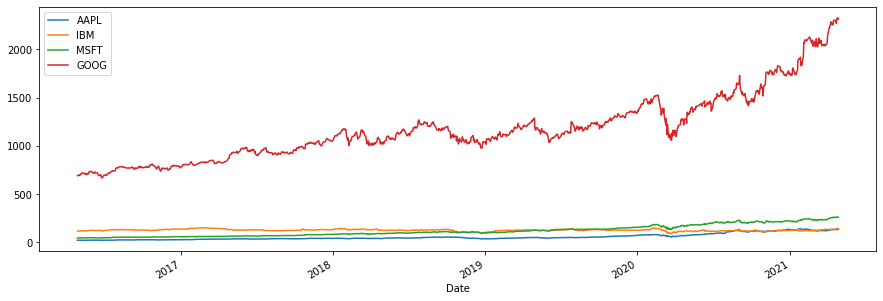

In [210]:
# plotting price dataframe. 
price.plot(figsize=(15,5))

In stock-markets, often one is interested in the _percent changes of the prices_
* % change from previous value

Let us compute it
- Actually, __let us ask Pandas to compute it__ for us!
- Method `pct_change()` does precisely this
  - Computes the percentage change from the immediately previous row by default. 
  - This is useful in comparing the percentage of change in a time series of elements.

In [211]:
returns = price.pct_change() 
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-04-21,0.002930,0.039013,0.008983,-0.000148
2021-04-22,-0.011685,-0.015813,-0.013086,-0.011063
2021-04-23,0.018039,0.008140,0.015476,0.020891
2021-04-26,0.002978,-0.006038,0.001532,0.004941
2021-04-27,-0.003340,0.002943,-0.003135,-0.006028


<AxesSubplot:xlabel='Date'>

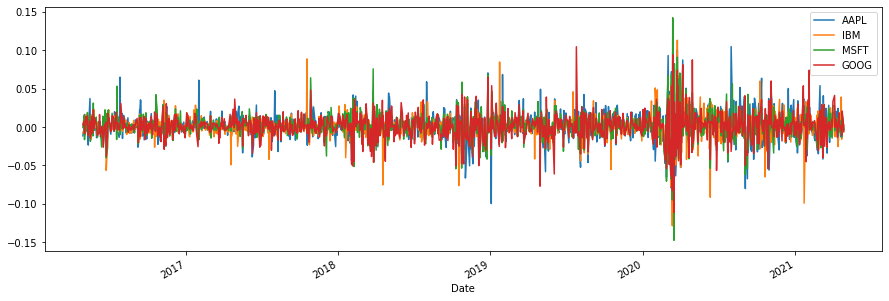

In [212]:
returns.plot(figsize=(15,5))

Can I smooth the data using moving averages/window averages?

In [213]:
returns_smooth=returns.rolling(15).sum()
returns_smooth

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-04-28,NaN,NaN,NaN,NaN
2016-04-29,NaN,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-04-21,0.109208,0.065750,0.118220,0.111266
2021-04-22,0.078757,0.060774,0.088226,0.093836
2021-04-23,0.089837,0.069139,0.075794,0.081314


<AxesSubplot:xlabel='Date'>

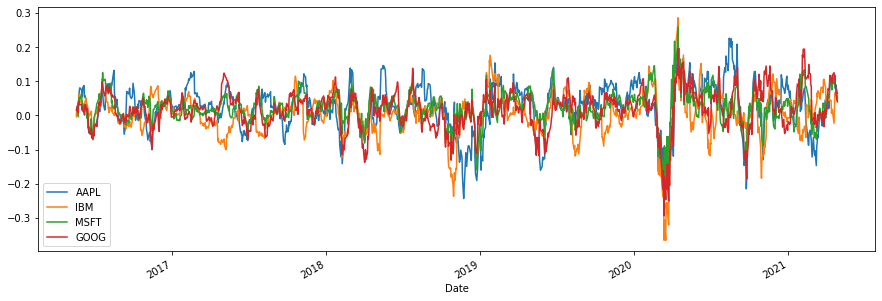

In [214]:
returns_smooth.plot(figsize=(15,5))

DataFrames offer two methods for computing 
* the correlation among the elements in the DataFrame (`corr`)
* the covariance matrix of the DataFrame (`cov`)

In [215]:
returns

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-04-28,NaN,NaN,NaN,NaN
2016-04-29,-0.011494,-0.007684,-0.000601,0.002880
2016-05-02,-0.001067,-0.004591,0.014839,0.007504
2016-05-03,0.016446,-0.007847,-0.016400,-0.008379
2016-05-04,-0.010401,0.000833,0.001808,0.004824
...,...,...,...,...
2021-04-21,0.002930,0.039013,0.008983,-0.000148
2021-04-22,-0.011685,-0.015813,-0.013086,-0.011063
2021-04-23,0.018039,0.008140,0.015476,0.020891


In [216]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.446761,0.720622,0.657219
IBM,0.446761,1.000000,0.534138,0.496122
MSFT,0.720622,0.534138,1.000000,0.775885
GOOG,0.657219,0.496122,0.775885,1.000000


In [217]:
returns.corr().style.background_gradient(cmap='Reds')

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.446761,0.720622,0.657219
IBM,0.446761,1.000000,0.534138,0.496122
MSFT,0.720622,0.534138,1.000000,0.775885
GOOG,0.657219,0.496122,0.775885,1.000000


In [218]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000362,0.000139,0.000237,0.000210
IBM,0.000139,0.000268,0.000151,0.000136
MSFT,0.000237,0.000151,0.000298,0.000224
GOOG,0.000210,0.000136,0.000224,0.000281


In [219]:
returns.cov().style.background_gradient(cmap='Reds')

,AAPL,IBM,MSFT,GOOG
AAPL,0.000362,0.000139,0.000237,0.000210
IBM,0.000139,0.000268,0.000151,0.000136
MSFT,0.000237,0.000151,0.000298,0.000224
GOOG,0.000210,0.000136,0.000224,0.000281


# More complex application to Italian COVID data - Advanced Plotting
Pandas offers a number of plotting methods for DataFrame objects

The Italian Civil Protection Department publishes everyday [data on the status of the COVID-19 epidemy in Italy](https://github.com/pcm-dpc/COVID-19)

The repository contains trend data of the COVID'19 pandemic in Italy
- ‘dati-andamento-nazionale’ (national-level), 
- ‘dati-regioni’ (regional-level),
- ‘dati-province’ (province-level) 

In [220]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")

## Line Plots
Series and DataFrame each have a plot method for making many different types of plots
* By default, they make line plots 

Let's load again the national-level COVID'19 data
- We set the date (`data`) as the index column
- We tell pandas to interpret such column as a datetime type

In [221]:
# load data relating to the national trend of SARS-CoV-2 spread on Pandas DataFrame
url_dpc_nazionale = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
covid_italy.tail()

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
data,,,,,,,,,,,,,,,,,,,,,
2021-04-22T17:00:00,ITA,22094,3021,25115,447081,472196,-3439,16050,3330392,118357,...,56250055,24905379.0,NaN,174.0,NaN,NaN,3788264.0,132681.0,43862164.0,12387891.0
2021-04-23T17:00:00,ITA,21440,2979,24419,441124,465543,-6653,14761,3351461,118699,...,56565755,25004299.0,NaN,153.0,NaN,NaN,3802126.0,133577.0,44037316.0,12528439.0
2021-04-24T17:00:00,ITA,20971,2894,23865,437583,461448,-4095,13817,3369048,119021,...,56886535,25114307.0,NaN,143.0,NaN,NaN,3815137.0,134380.0,44211571.0,12674964.0
2021-04-25T17:00:00,ITA,20662,2862,23524,437688,461212,-236,13158,3382224,119238,...,57126017,25204896.0,NaN,114.0,NaN,NaN,3827656.0,135018.0,44357013.0,12769004.0
2021-04-26T17:00:00,ITA,20635,2849,23484,429328,452812,-8400,8444,3398763,119539,...,57271836,25260009.0,NaN,132.0,NaN,NaN,3835849.0,135265.0,44452541.0,12819295.0


In [222]:
print(covid_italy.index)
covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
#covid_italy.tail()
print()
print(covid_italy.index)

Index(['2020-02-24T18:00:00', '2020-02-25T18:00:00', '2020-02-26T18:00:00',
       '2020-02-27T18:00:00', '2020-02-28T18:00:00', '2020-02-29T18:00:00',
       '2020-03-01T18:00:00', '2020-03-02T18:00:00', '2020-03-03T18:00:00',
       '2020-03-04T18:00:00',
       ...
       '2021-04-17T17:00:00', '2021-04-18T17:00:00', '2021-04-19T17:00:00',
       '2021-04-20T17:00:00', '2021-04-21T17:00:00', '2021-04-22T17:00:00',
       '2021-04-23T17:00:00', '2021-04-24T17:00:00', '2021-04-25T17:00:00',
       '2021-04-26T17:00:00'],
      dtype='object', name='data', length=428)

DatetimeIndex(['2020-02-24 18:00:00', '2020-02-25 18:00:00',
               '2020-02-26 18:00:00', '2020-02-27 18:00:00',
               '2020-02-28 18:00:00', '2020-02-29 18:00:00',
               '2020-03-01 18:00:00', '2020-03-02 18:00:00',
               '2020-03-03 18:00:00', '2020-03-04 18:00:00',
               ...
               '2021-04-17 17:00:00', '2021-04-18 17:00:00',
               '2021-04-19 17:00:00', '

Let us focucs only on
- currently infected (`totale_positivi`)
- overall recovered (`dimessi_guariti`)
- overall deceased (`deceduti`)

In [223]:
covid_italy_filter = covid_italy[['totale_positivi','dimessi_guariti','deceduti' ]]
covid_italy_filter

,totale_positivi,dimessi_guariti,deceduti
data,,,
2020-02-24 18:00:00,221,1,7
2020-02-25 18:00:00,311,1,10
2020-02-26 18:00:00,385,3,12
2020-02-27 18:00:00,588,45,17
2020-02-28 18:00:00,821,46,21
...,...,...,...
2021-04-22 17:00:00,472196,3330392,118357
2021-04-23 17:00:00,465543,3351461,118699
2021-04-24 17:00:00,461448,3369048,119021


During the peek in Spring 2020, the Italian government made a number of urgent decrees (links in Italian)
- Decree "Zone Rosse"
  - Some areas were classified as _red zones_, i.e. put in lockdown
- Decree ["Io resto a casa"](https://www.agenziacoesione.gov.it/news_istituzionali/emergenza-epidemiologica-covid-19-fine-al-25-marzo-stop-alle-attivita-commerciali-al-dettaglio-in-tutta-italia-dpcm-11-marzo-2020/)
  - Only the _necessary_ industrial and commercial production activities were left open nation-wide
  - Not movements outside the city of residence
- Decree ["Chiudi Italia"](http://www.governo.it/it/articolo/coronavirus-firmato-il-dpcm-22-marzo-2020/14363)
  - Hard lockdown nation-wide
- Decree ["Fase 2"](http://www.salute.gov.it/portale/news/p3_2_1_1_1.jsp?lingua=italiano&menu=notizie&p=dalministero&id=4763)
  - Partial re-opening
  
Let us look at **how were the numbers at that time**

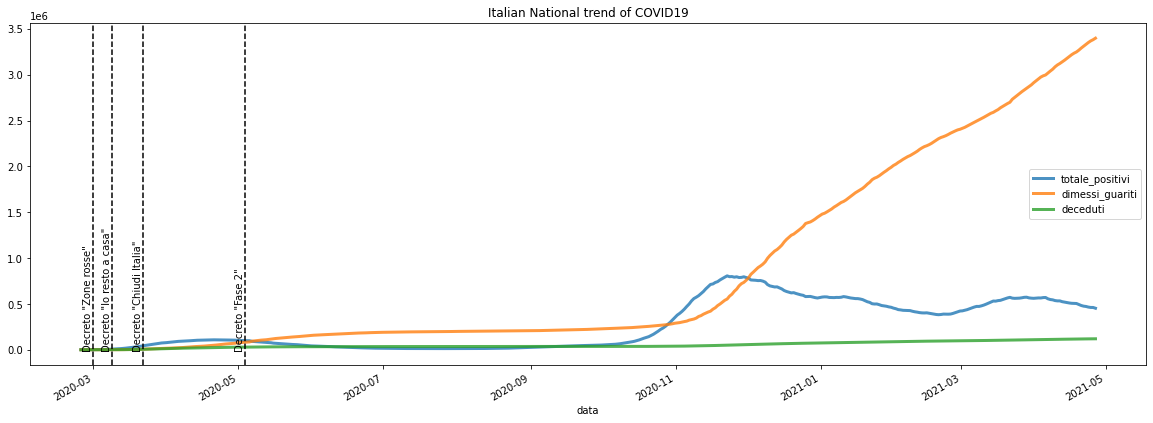

In [224]:
from datetime import datetime

# We now create the plot
covid_italy_filter.plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 

# and add annotations
annotations = {datetime(2020, 3, 1) :'Decreto "Zone rosse"',
               datetime(2020, 3, 9) :'Decreto "Io resto a casa"',
               datetime(2020, 3, 22):'Decreto "Chiudi Italia"',
               datetime(2020, 5, 4) :'Decreto "Fase 2"'}
 
for d,a in annotations.items():
    plt.annotate(a,(d, 0), rotation=90, horizontalalignment='right')
    plt.axvline(d, color='k', linestyle='--')   
    
plt.show()

We have too many data points 
- making it difficult to focus on the 4 dates of interest

Let's hide some
- using `iloc` to consider the first 100 rows
- using `loc` to consider the rows with date before June
- using `drop` to drop the rows from June onward

But first, let's create a function to add annotations to the _current_ plot

In [225]:
def add_annotations():
    # and add annotations
    annotations = {datetime(2020, 3, 1) :'Decreto "Zone rosse"',
                   datetime(2020, 3, 9) :'Decreto "Io resto a casa"',
                   datetime(2020, 3, 22):'Decreto "Chiudi Italia"',
                   datetime(2020, 5, 4) :'Decreto "Fase 2"'}
 
    for d,a in annotations.items():
        plt.annotate(a,(d, 0), rotation=90, horizontalalignment='right')
        plt.axvline(d, color='k', linestyle='--')   

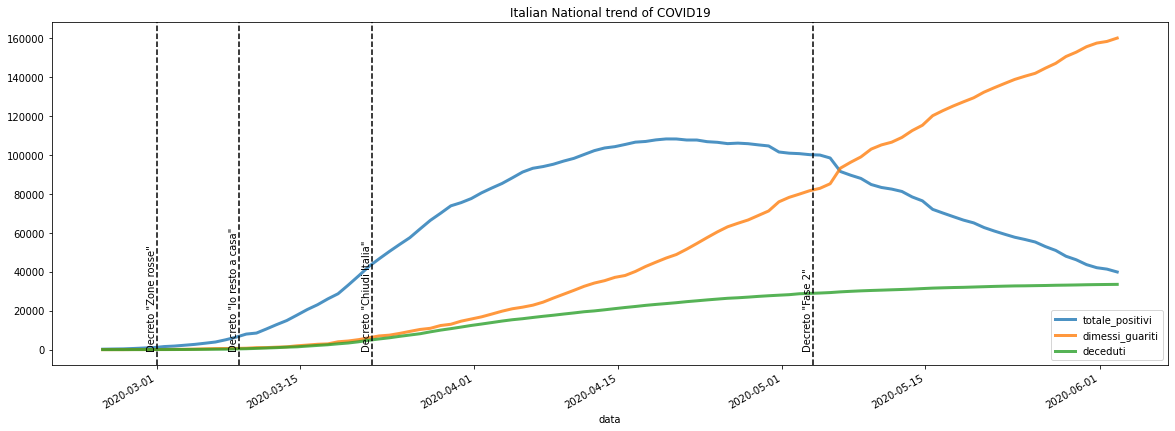

In [226]:
covid_italy_filter.iloc[:100].plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations() 
plt.show()

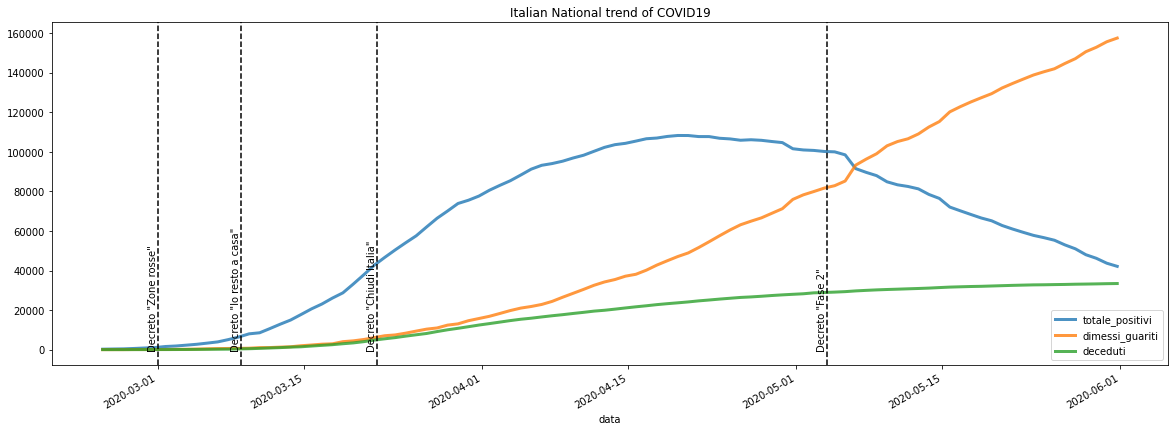

In [227]:
covid_italy_filter.loc[covid_italy_filter.index<= datetime(2020, 6, 1)].plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations()     
plt.show()

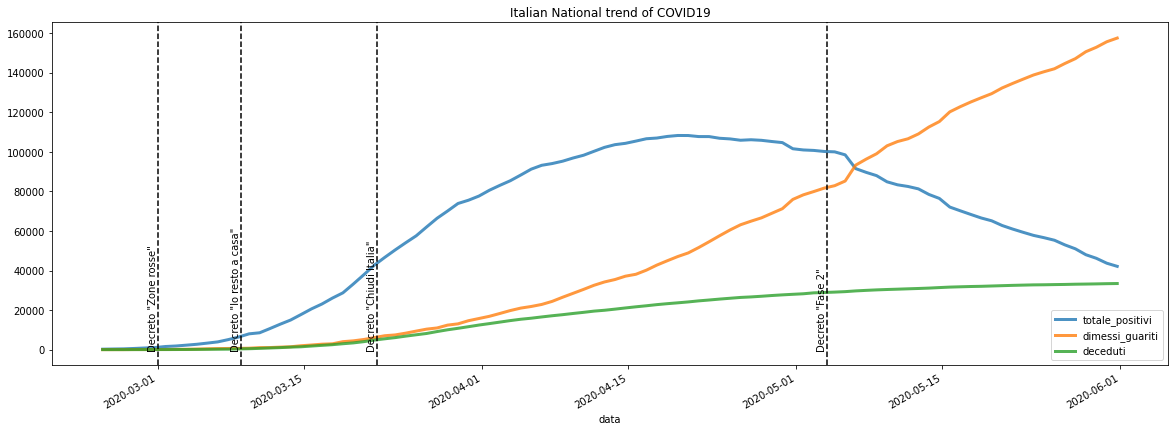

In [228]:
covid_italy_filter.drop(covid_italy_filter[covid_italy_filter.index > datetime(2020, 6, 1)].index).plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations()     
plt.show()

## Bar Plots
Making bar plots instead of line plots is as simple as passing 
* `kind='bar'` (for vertical bars) or 
* `kind='barh'` (for horizontal bars).

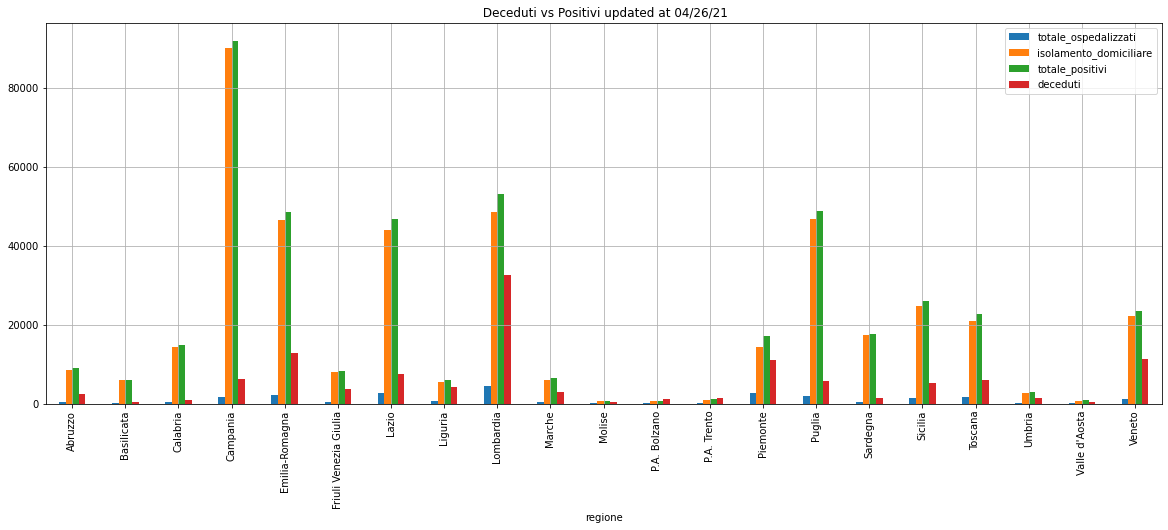

In [229]:
# load data relating to the regional trend of SARS-CoV-2 spread
url_dpc_regioni = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
covid_regions = pd.read_csv(url_dpc_regioni)
covid_regions.index = pd.to_datetime(covid_regions.data)
covid_regions = covid_regions.rename(columns={'denominazione_regione': 'regione'})

# get last day data
cov_regions_last_day = covid_regions[covid_regions.data ==  covid_regions.data.iloc[-1]] # get last day data
cov_regions_last_day.index = cov_regions_last_day.regione # set Region as index

#drop some unnecessary columns
cov_regions_last_day = cov_regions_last_day.drop(['lat','long','codice_regione',"stato","regione","note"], axis = 1)

#Let's get the data of interest (Deceduti vs Positivi) and plot them
title = f" Deceduti vs Positivi updated at {covid_regions.index[-1].strftime('%D')}"
#Here we are using 'bar!'
cov_regions_last_day[['totale_ospedalizzati','isolamento_domiciliare','totale_positivi','deceduti']].plot(kind='bar', figsize =(20,7),grid=True,title=title)

plt.show()

### Stacked bar plots
Stacked bar plots are created from a DataFrame by passing `stacked=True`, 
- resulting in the value in each row being stacked together

Let's compare 'terapia_intensiva' and 'totale_ospedalizzati' on latest day

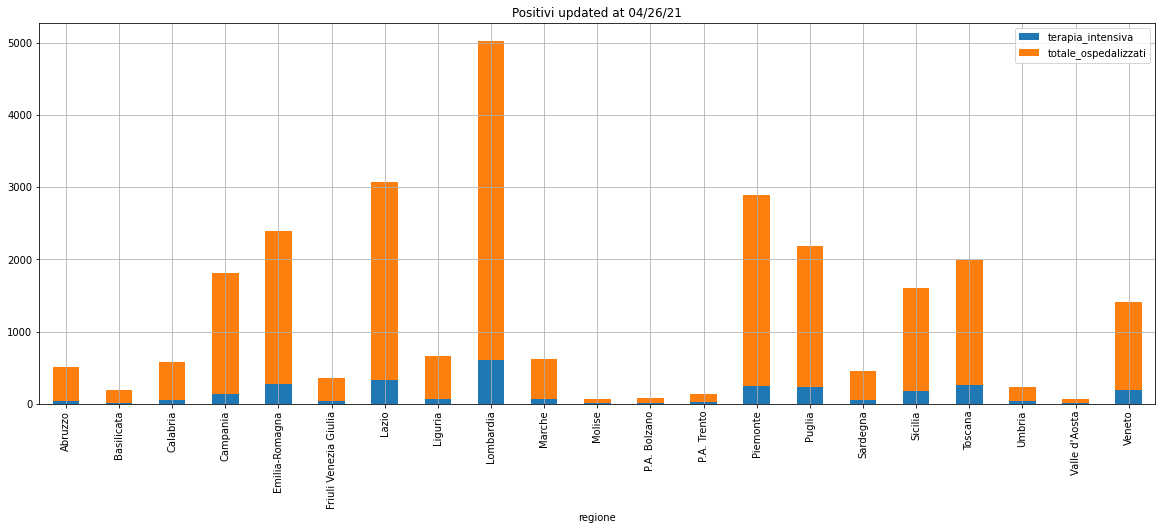

In [230]:
title = f"Positivi updated at {covid_regions.index[-1].strftime('%D')}"
cov_regions_last_day[['terapia_intensiva','totale_ospedalizzati']].plot(kind='bar', stacked=True, figsize =(20,7),grid=True,title=title)
plt.show()

## Scatter Matrix 
In exploratory data analysis it is helpful to look at how pairs of variables relate to each other
* we are interested in _plots relating pairs of variables_
* this is known as a _pairs plot_ or _scatter plot matrix_. 

Making such a plot from scratch requires a bit of work. 
* Luckily pandas has a `scatter_matrix` function for creating one from a DataFrame. 
* It also supports placing histograms or density plots of each variable along the diagonal.

In [231]:
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
covid_italy.tail()

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
data,,,,,,,,,,,,,,,,,,,,,
2021-04-22 17:00:00,ITA,22094,3021,25115,447081,472196,-3439,16050,3330392,118357,...,56250055,24905379.0,NaN,174.0,NaN,NaN,3788264.0,132681.0,43862164.0,12387891.0
2021-04-23 17:00:00,ITA,21440,2979,24419,441124,465543,-6653,14761,3351461,118699,...,56565755,25004299.0,NaN,153.0,NaN,NaN,3802126.0,133577.0,44037316.0,12528439.0
2021-04-24 17:00:00,ITA,20971,2894,23865,437583,461448,-4095,13817,3369048,119021,...,56886535,25114307.0,NaN,143.0,NaN,NaN,3815137.0,134380.0,44211571.0,12674964.0
2021-04-25 17:00:00,ITA,20662,2862,23524,437688,461212,-236,13158,3382224,119238,...,57126017,25204896.0,NaN,114.0,NaN,NaN,3827656.0,135018.0,44357013.0,12769004.0
2021-04-26 17:00:00,ITA,20635,2849,23484,429328,452812,-8400,8444,3398763,119539,...,57271836,25260009.0,NaN,132.0,NaN,NaN,3835849.0,135265.0,44452541.0,12819295.0


In [232]:
#drop unnecessary columns
covid_italy.drop(columns=["note_test","note_casi"], inplace=True)

In [233]:
covid_italy['totale_casi']

data
2020-02-24 18:00:00        229
2020-02-25 18:00:00        322
2020-02-26 18:00:00        400
2020-02-27 18:00:00        650
2020-02-28 18:00:00        888
                        ...   
2021-04-22 17:00:00    3920945
2021-04-23 17:00:00    3935703
2021-04-24 17:00:00    3949517
2021-04-25 17:00:00    3962674
2021-04-26 17:00:00    3971114
Name: totale_casi, Length: 428, dtype: int64

In [234]:
covid_italy['terapia_intensiva']

data
2020-02-24 18:00:00      26
2020-02-25 18:00:00      35
2020-02-26 18:00:00      36
2020-02-27 18:00:00      56
2020-02-28 18:00:00      64
                       ... 
2021-04-22 17:00:00    3021
2021-04-23 17:00:00    2979
2021-04-24 17:00:00    2894
2021-04-25 17:00:00    2862
2021-04-26 17:00:00    2849
Name: terapia_intensiva, Length: 428, dtype: int64

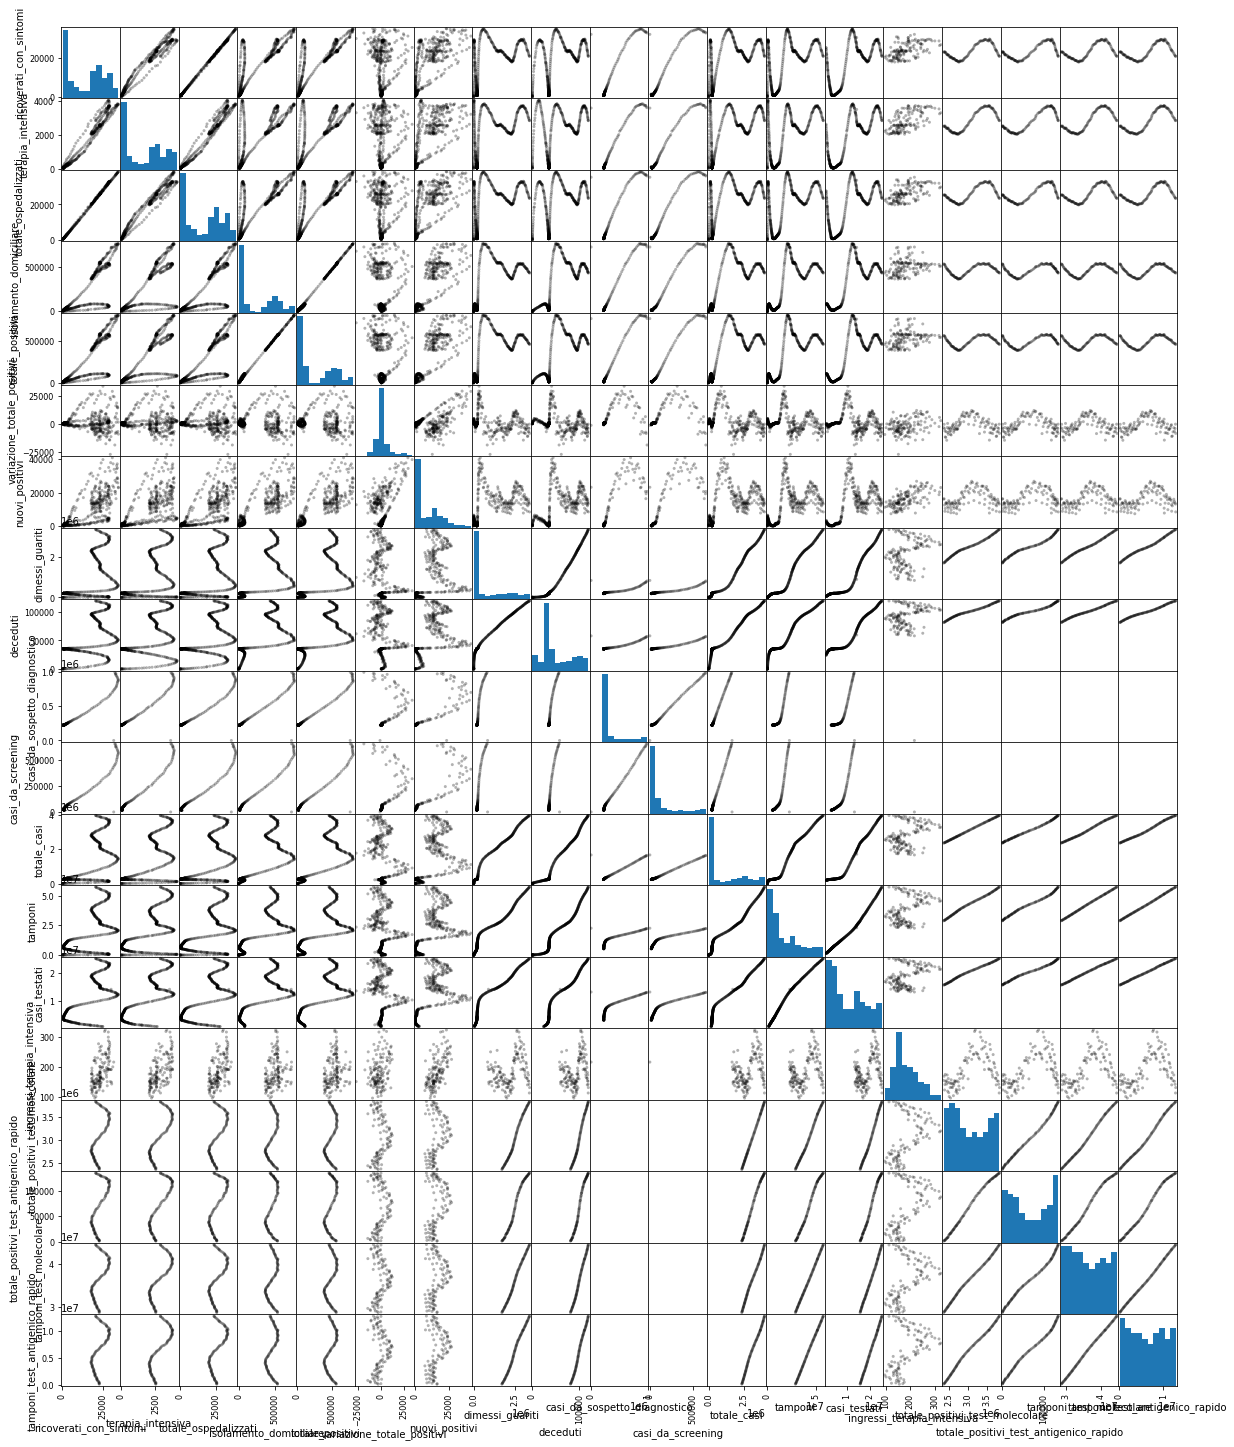

In [235]:
pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()

Too much data here!
- let's remove some more mostly empty rows

In [236]:
covid_italy[["totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"]]

,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
data,,,,
2020-02-24 18:00:00,NaN,NaN,NaN,NaN
2020-02-25 18:00:00,NaN,NaN,NaN,NaN
2020-02-26 18:00:00,NaN,NaN,NaN,NaN
2020-02-27 18:00:00,NaN,NaN,NaN,NaN
2020-02-28 18:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-04-22 17:00:00,3788264.0,132681.0,43862164.0,12387891.0
2021-04-23 17:00:00,3802126.0,133577.0,44037316.0,12528439.0
2021-04-24 17:00:00,3815137.0,134380.0,44211571.0,12674964.0


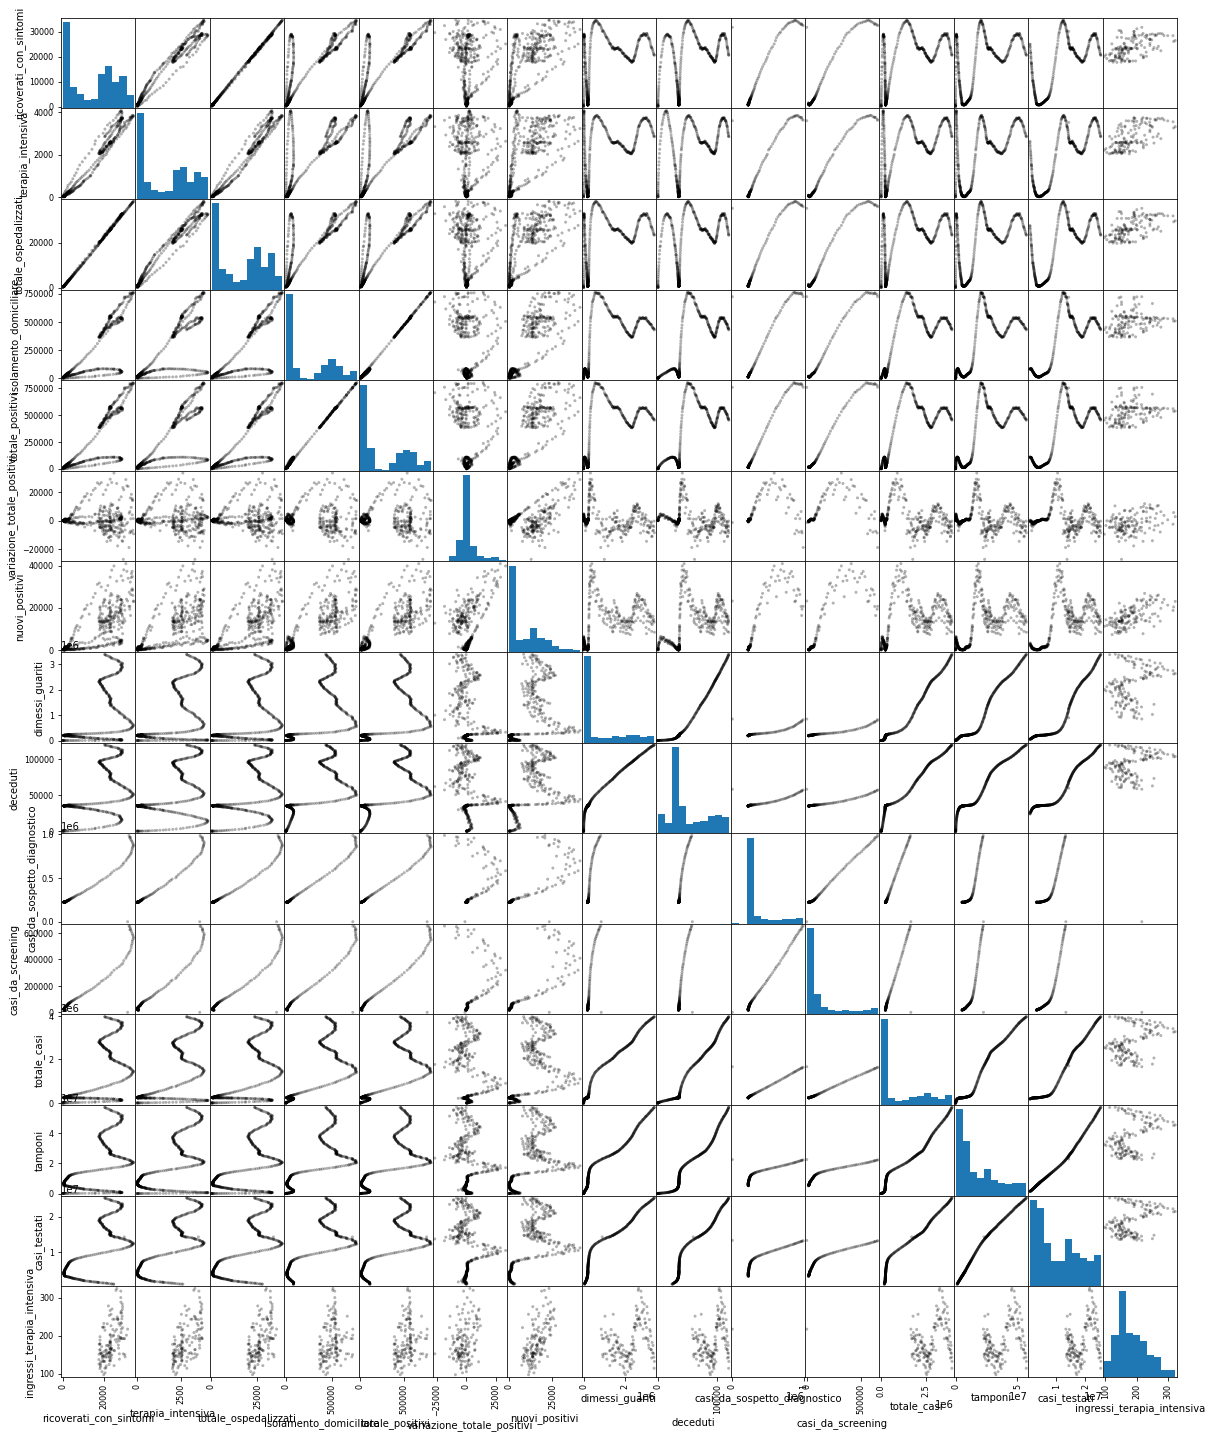

In [237]:
covid_italy.drop(columns=["totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)
pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()